# Hungarian Multi Rings

**Goal:** In the past `# Hungarian-multi-blobs` notebook, it wasn't working for the ring, so Lukas was suggesting checking the blobs, and then continuously varying between the rings and the blobs.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import torch
import torch.nn.functional as F

from scipy.optimize import linear_sum_assignment

import os
os.sys.path.append('code')
from train import train
from model import SlotAttentionPosEmbed
from data import make_batch
from plotting import plot_kslots, plot_kslots_iters, plot_kslots_grads

import yaml, json

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Modifying Flo's data generation

In [42]:
nPixels = 32

xlow = -0.5
xhigh = 0.5
binWidth = (xhigh-xlow)/(nPixels+1)

bins = np.arange(-0.5, 0.5, 1/33)


Let's consider:
- batch_size 4
- 2 rings
- 3 slots

In [43]:
max_n_rings = 2
device= 'cuda:0'

In [46]:
bs=2

kwargs={'bins': bins,
        'N_clusters':max_n_rings,
        'isRing':False,
        'device':device, 
        'stdlow':0.001,
        'stdhigh':0.005}

X, Y, true = make_batch(N_events=bs,**kwargs)

/gpfs/slac/atlas/fs1/d/nhartman/Slot Attention/code/data.py:94: RuntimeWarning: invalid value encountered in true_divide
  eventMasks = np.where(eventHistograms>0,eventMasks/eventHistograms,eventMasks)


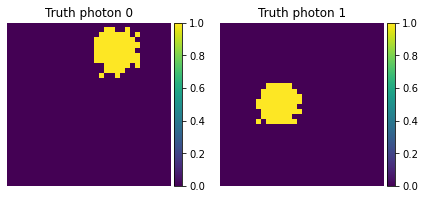

In [47]:
iEvt=1

if max_n_rings>1:
    
    fig, axs = plt.subplots(1,max_n_rings,figsize=(max_n_rings*3+1,3))

    for i,ax in enumerate(axs):

        im = ax.imshow(true[iEvt,i].cpu().numpy(),vmin=0,vmax=1)

        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')

        ax.set_title(f'Truth photon {i}')

        ax.axis('off')

    plt.show()

**Define the model**

In [48]:
from torch.nn import init

In [49]:
k_slots=max_n_rings+1

In [80]:
os.mkdir('code/figures')

In [81]:
modelDir = 'code/models/blob3-long-wu'
figDir = 'code/figures/blob3-long-wu'
for d in [modelDir,figDir]:
    os.mkdir(d)

Train the model!!

Training model with 3 slots on 2blobs
iter 0 , loss 0.7243694 , lr 0.0


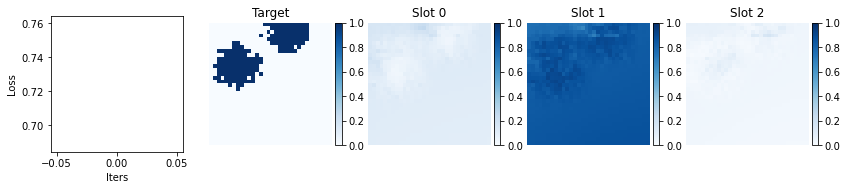

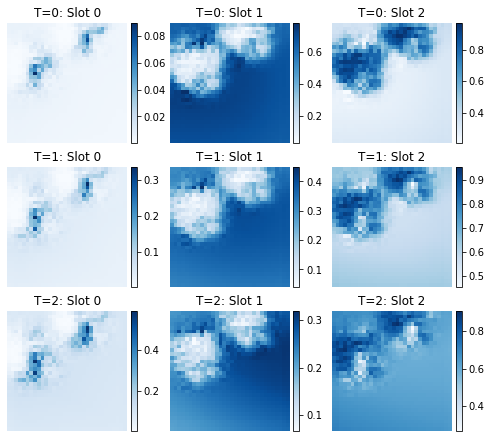

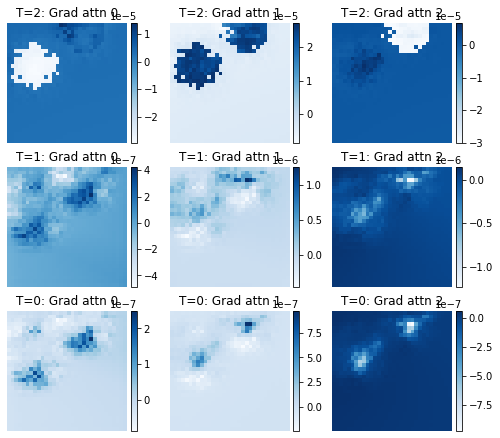

iter 500 , loss 0.5050316 , lr 2.9792774863111075e-05


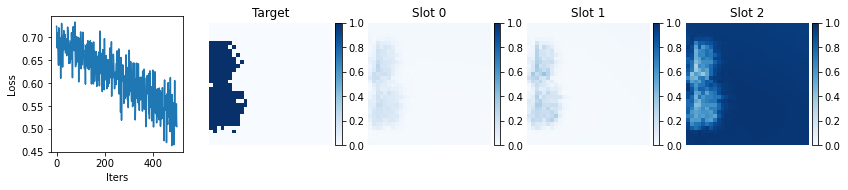

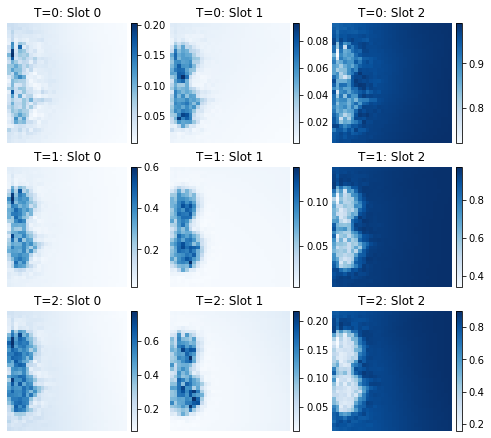

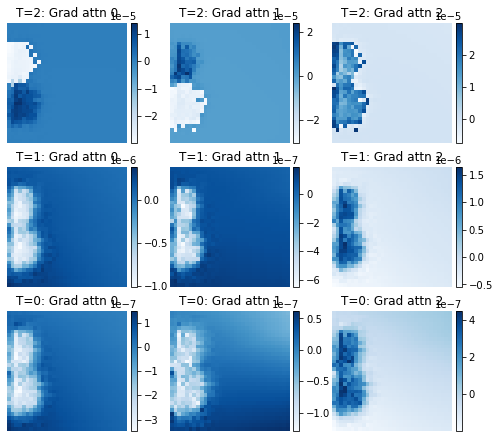

iter 1000 , loss 0.3798855 , lr 5.917396226960155e-05


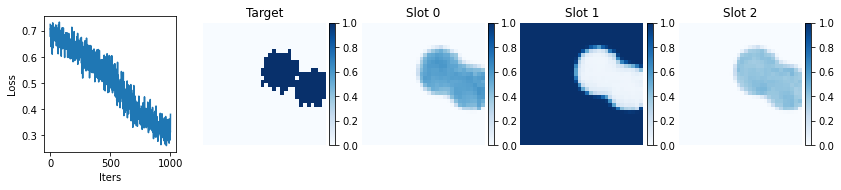

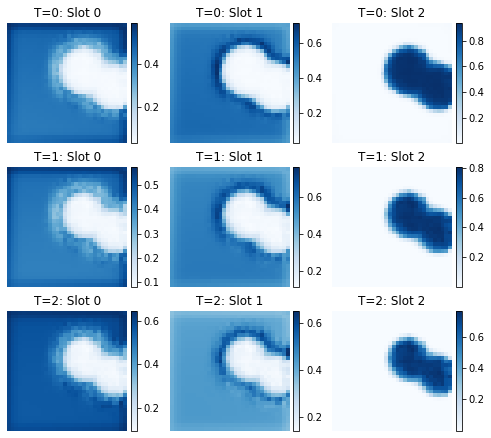

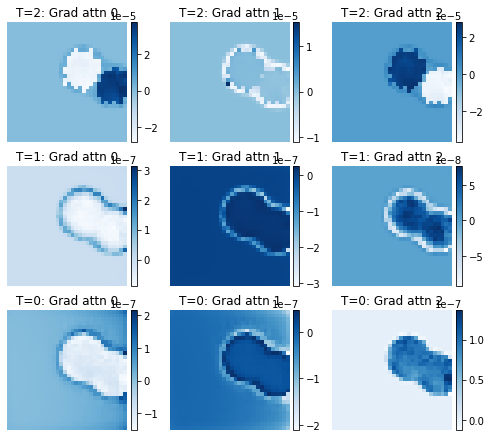

iter 1500 , loss 0.2574169 , lr 8.81478267828234e-05


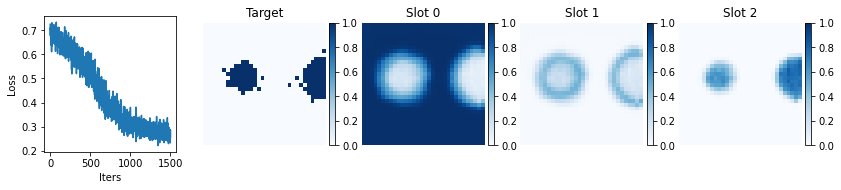

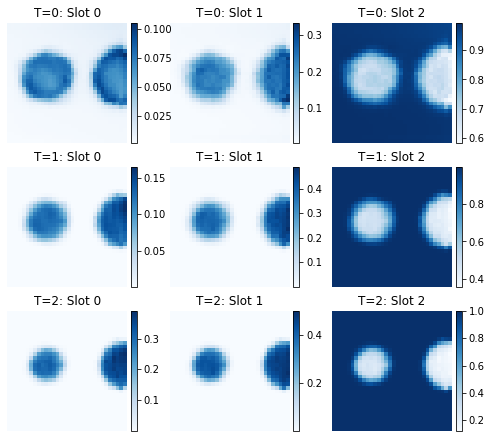

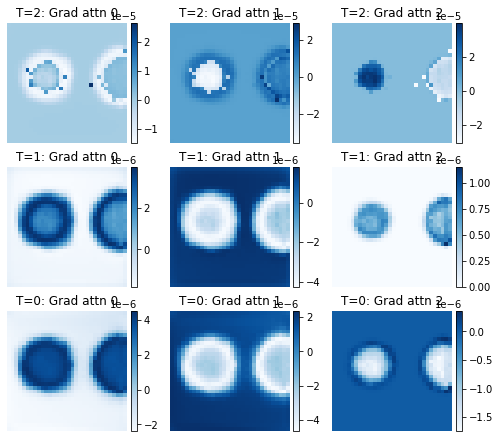

iter 2000 , loss 0.22815472 , lr 0.00011671859368947427


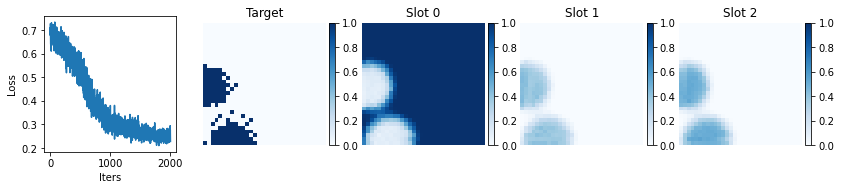

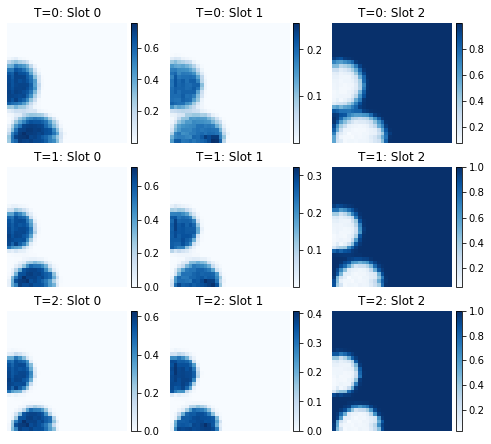

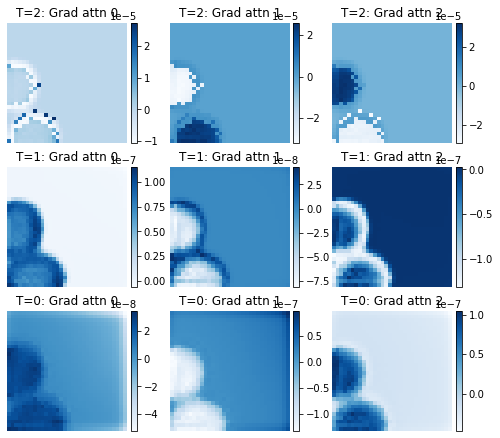

iter 2500 , loss 0.25319397 , lr 0.00014489044933872682


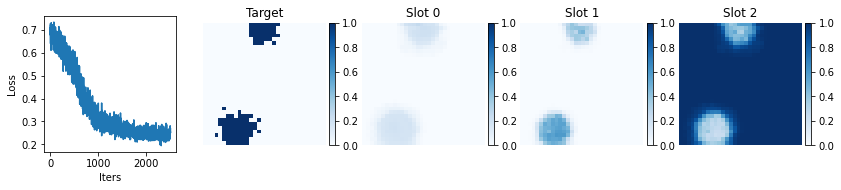

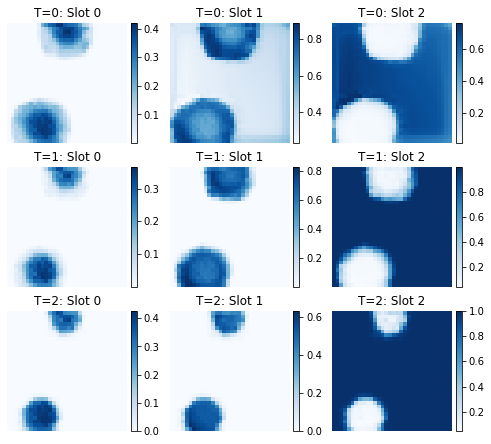

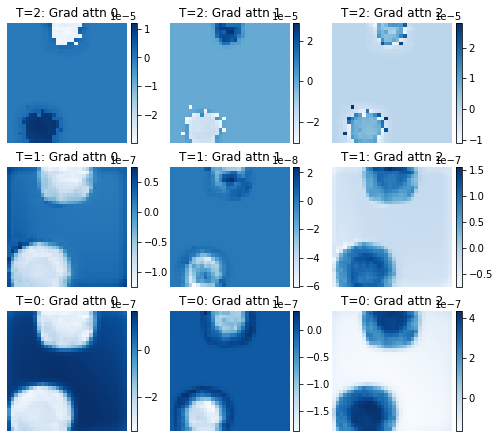

iter 3000 , loss 0.21829332 , lr 0.00017266754147854757


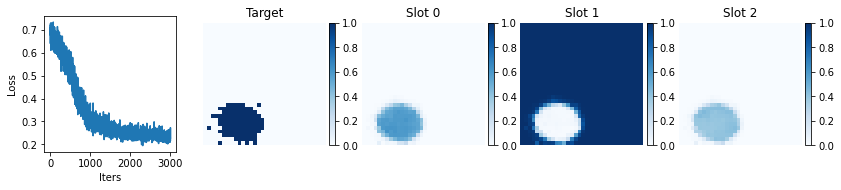

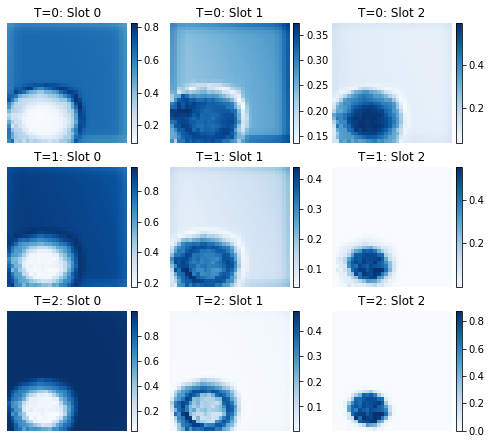

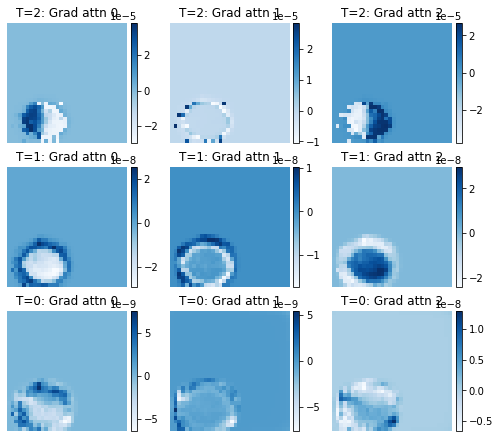

iter 3500 , loss 0.22371343 , lr 0.0002000539795892268


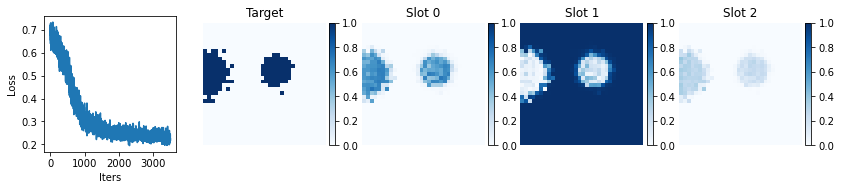

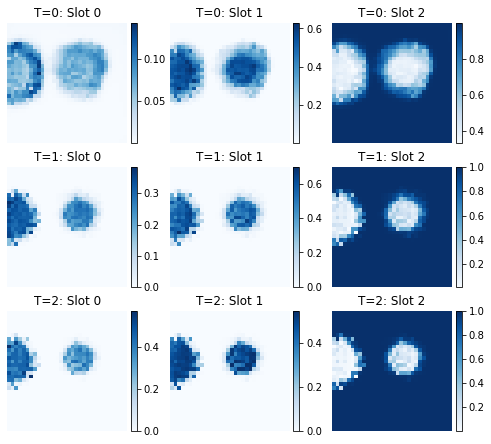

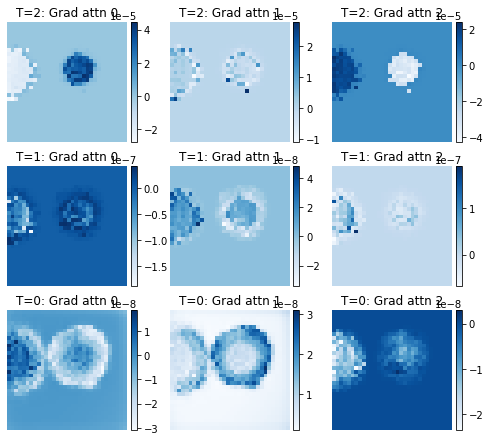

iter 4000 , loss 0.20455904 , lr 0.00022705383521414303


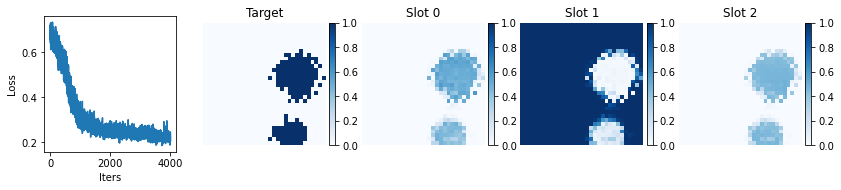

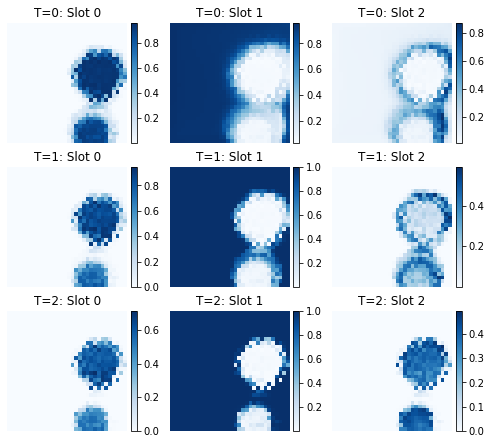

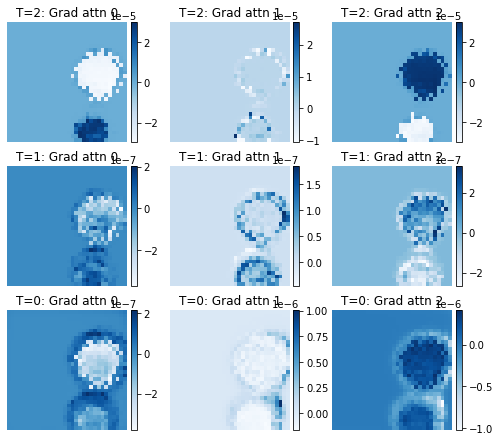

iter 4500 , loss 0.20853002 , lr 0.0002536711422877832


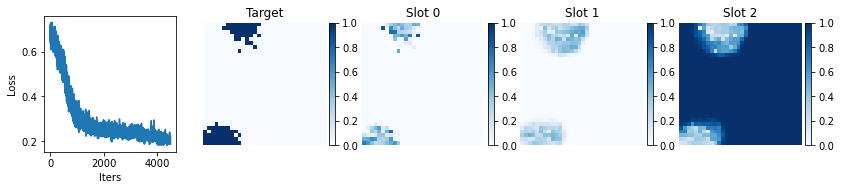

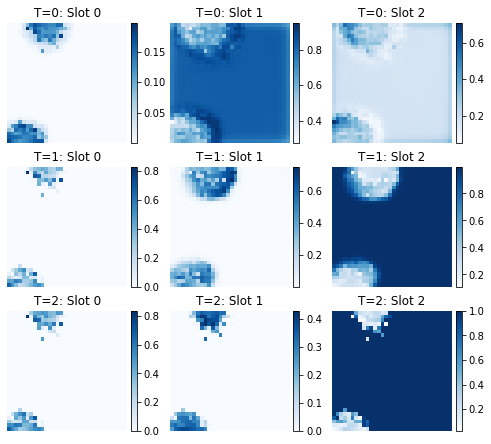

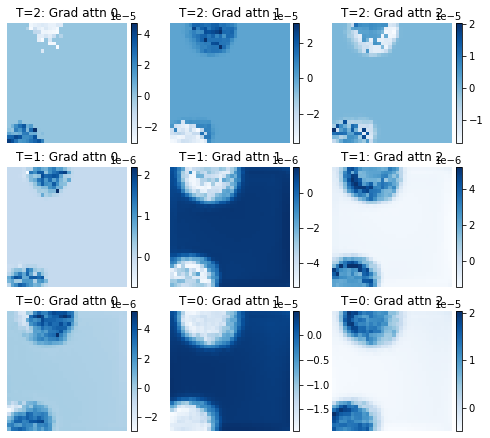

iter 5000 , loss 0.22454181 , lr 0.0002799098974610422


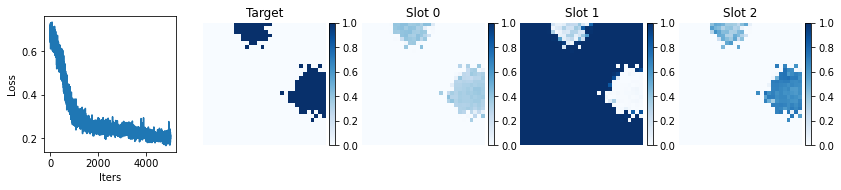

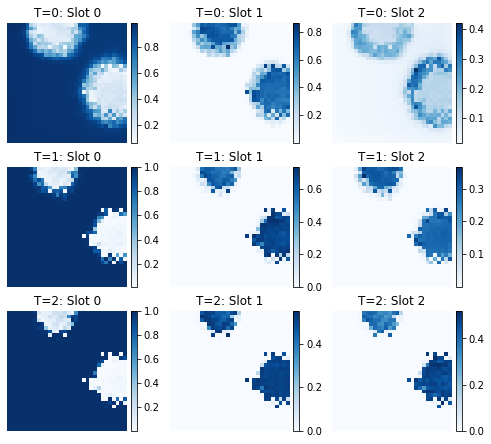

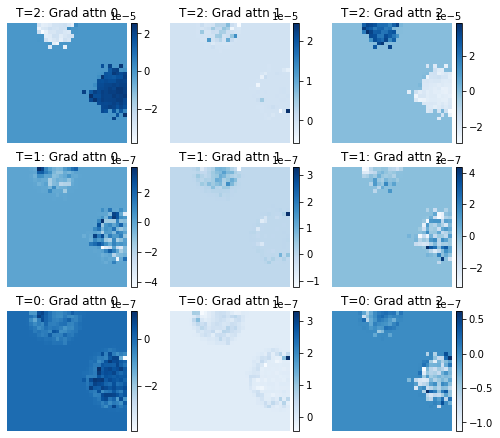

iter 5500 , loss 0.18564045 , lr 0.00027797641856711124


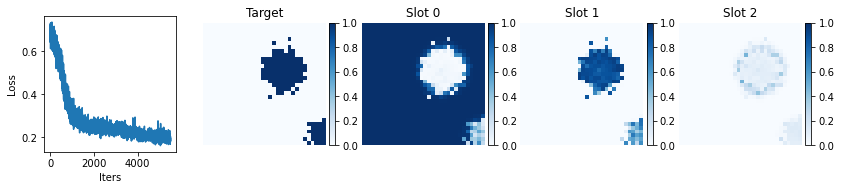

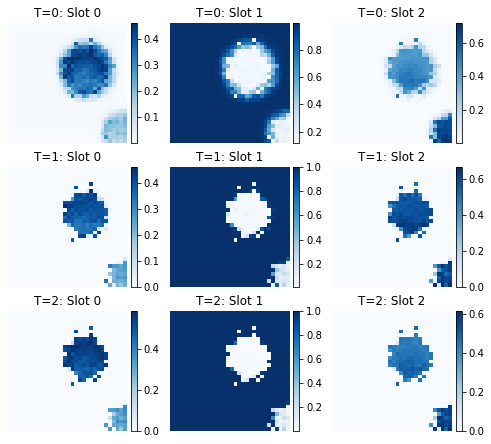

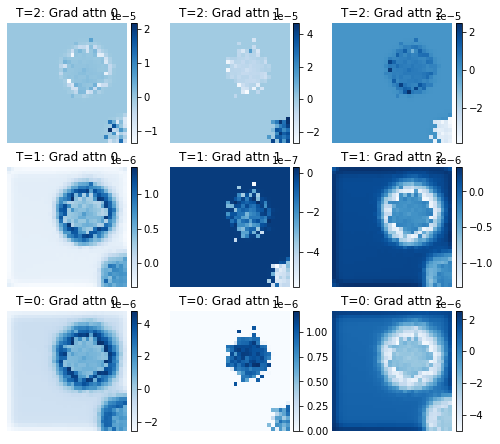

iter 6000 , loss 0.2176558 , lr 0.0002760562951874625


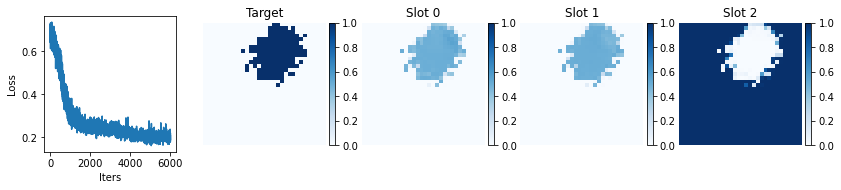

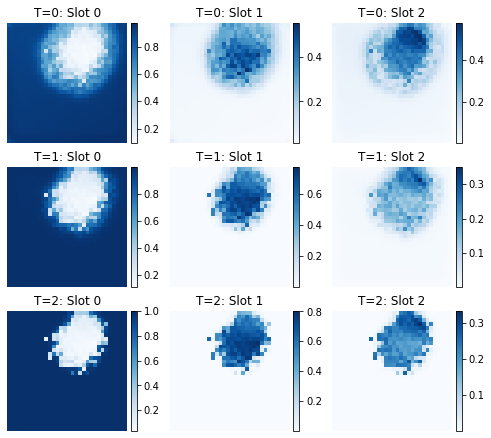

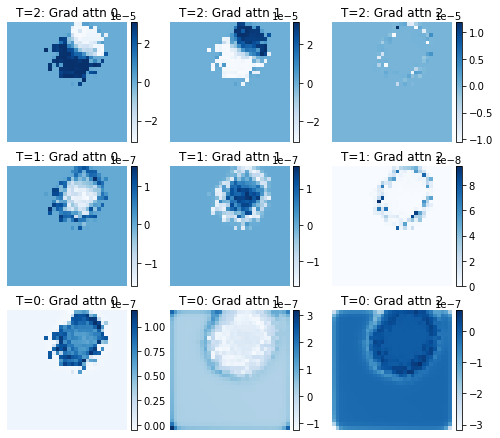

iter 6500 , loss 0.2128253 , lr 0.0002741494350688201


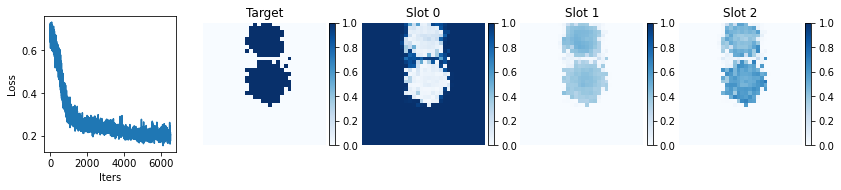

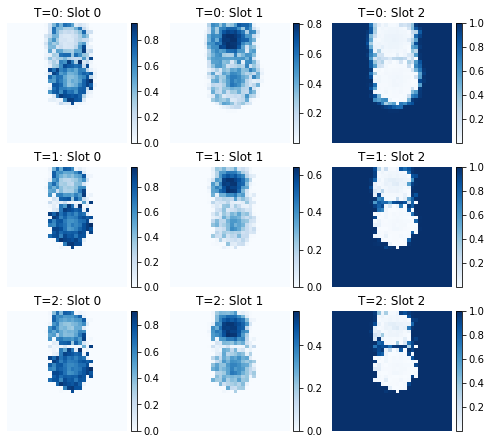

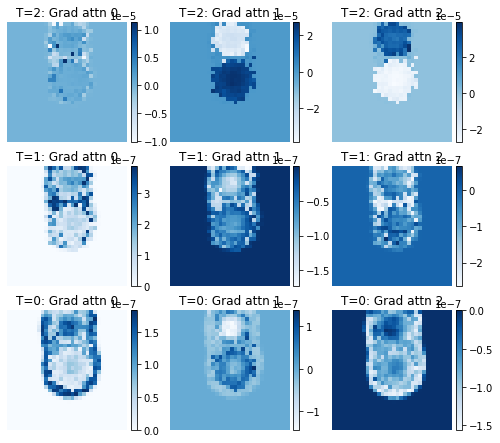

iter 7000 , loss 0.18415275 , lr 0.00027225574659514823


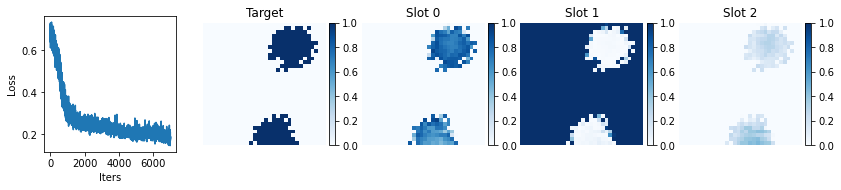

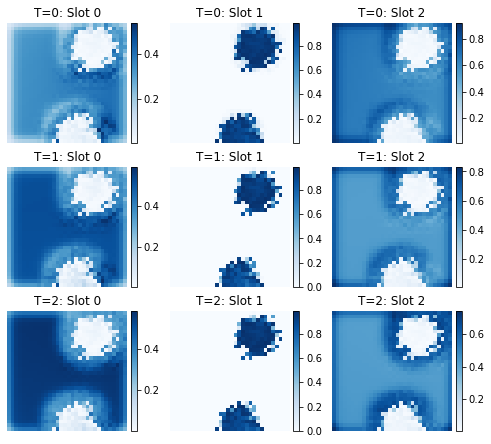

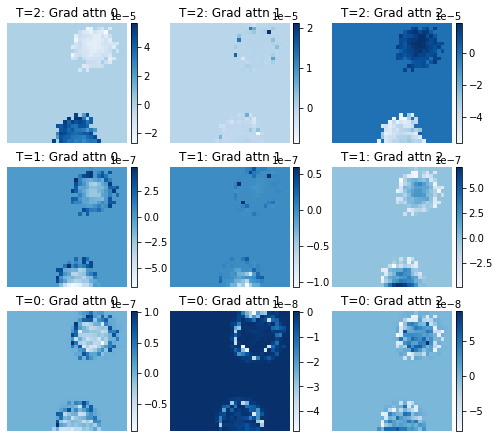

iter 7500 , loss 0.180328 , lr 0.00027037513878324905


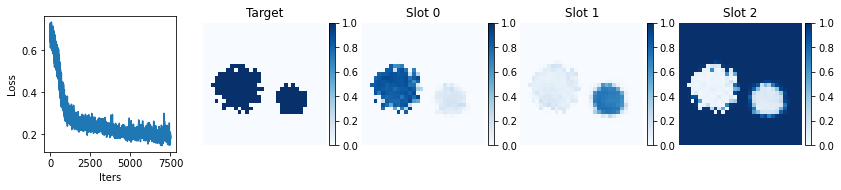

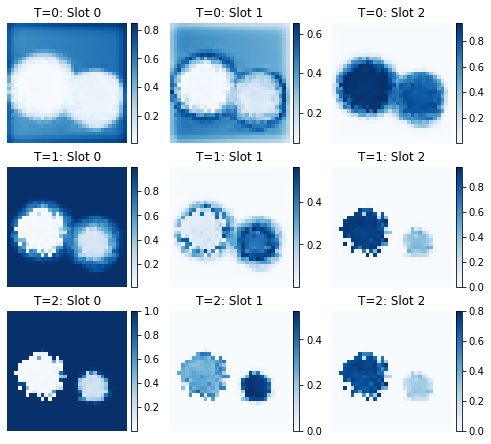

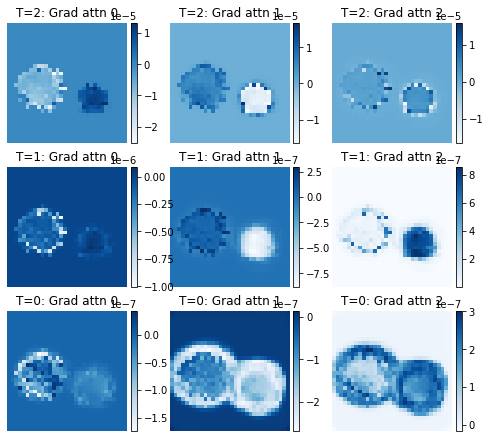

iter 8000 , loss 0.2103728 , lr 0.00026850752127839173


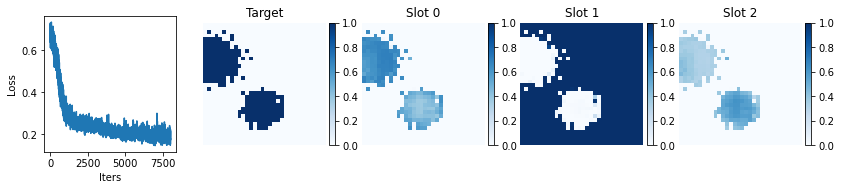

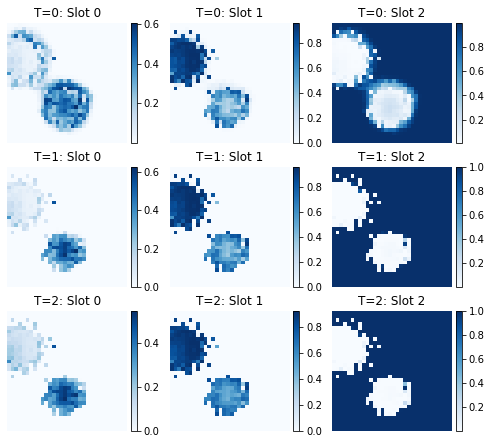

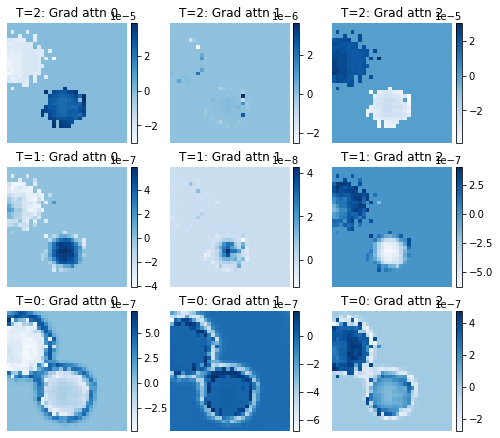

iter 8500 , loss 0.17807691 , lr 0.00026665280434997105


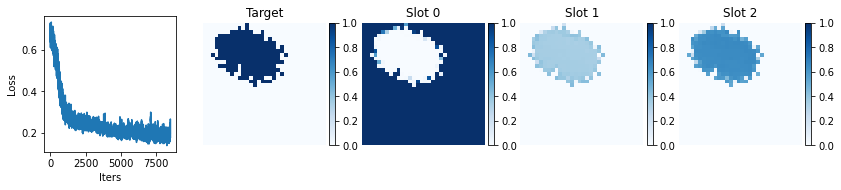

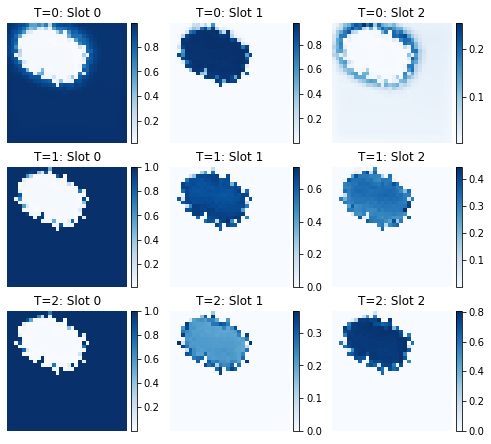

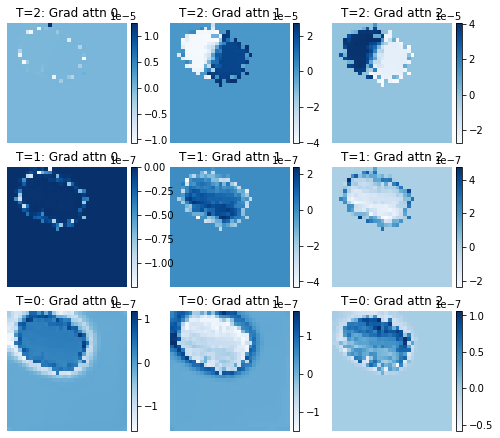

iter 9000 , loss 0.16552934 , lr 0.00026481089888719643


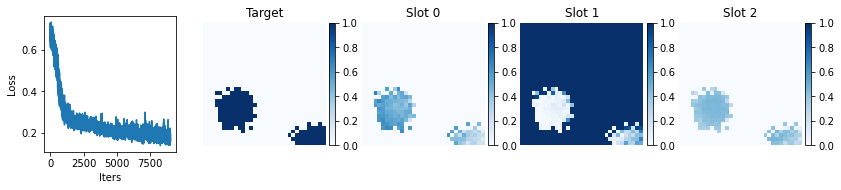

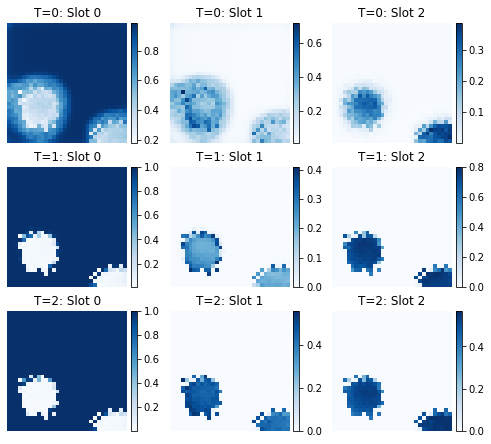

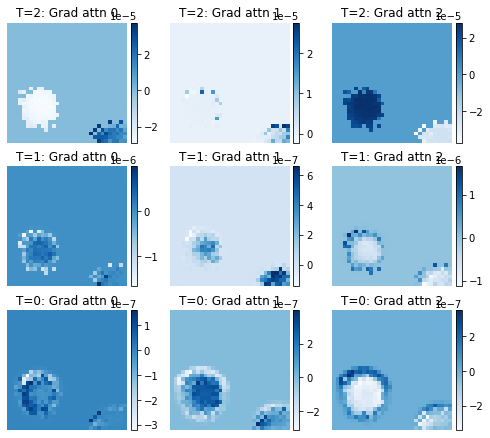

iter 9500 , loss 0.17162362 , lr 0.0002629817163948105


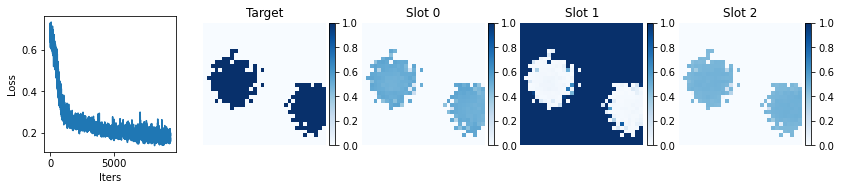

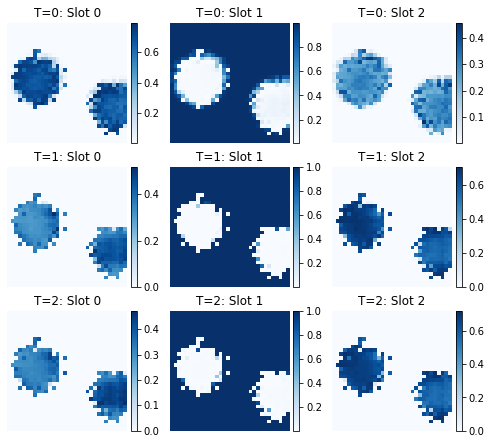

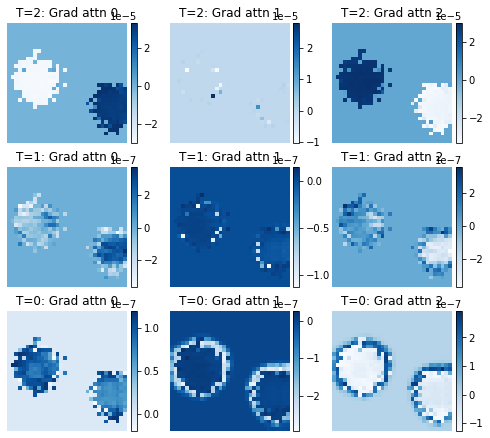

iter 10000 , loss 0.17401963 , lr 0.0002611651689888372


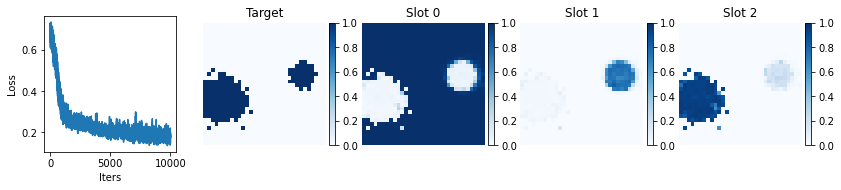

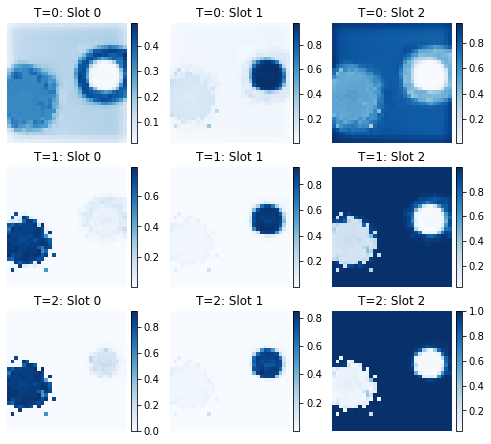

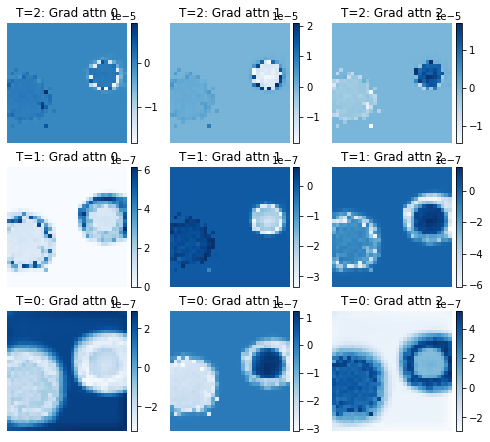

iter 10500 , loss 0.20700766 , lr 0.0002593611693923595


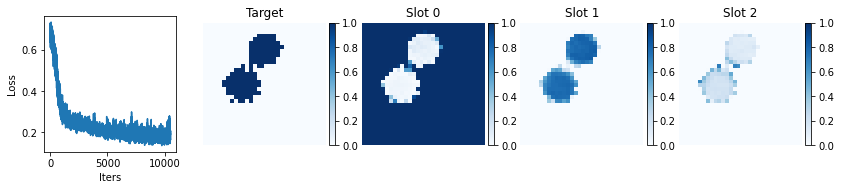

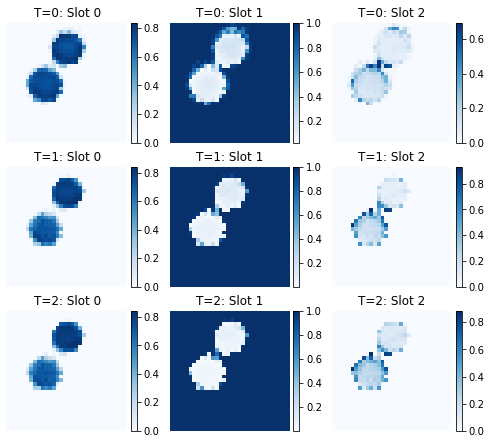

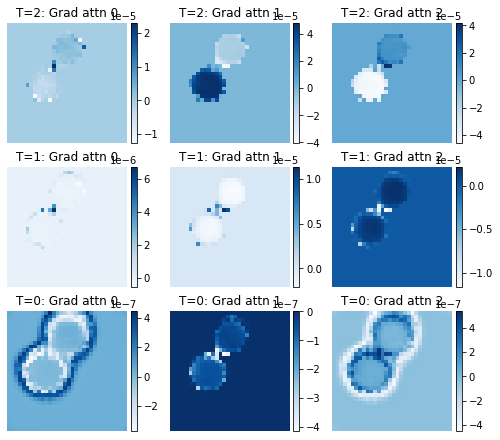

iter 11000 , loss 0.1542284 , lr 0.0002575696309313261


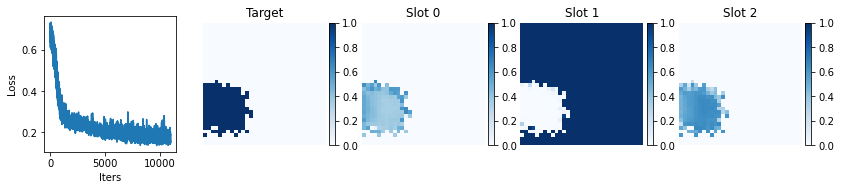

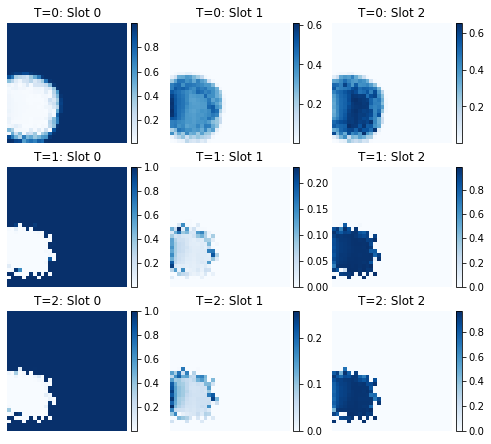

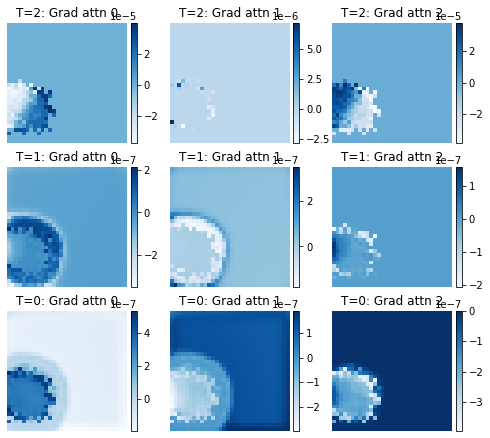

iter 11500 , loss 0.1942426 , lr 0.000255790467530387


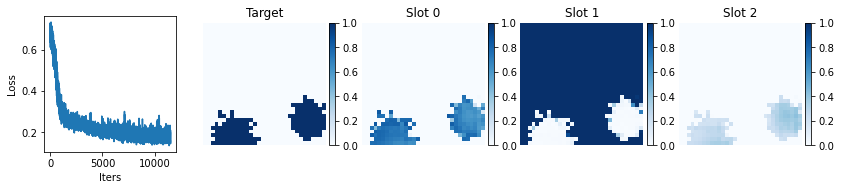

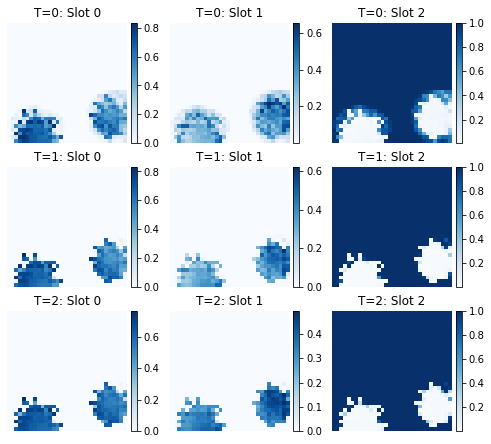

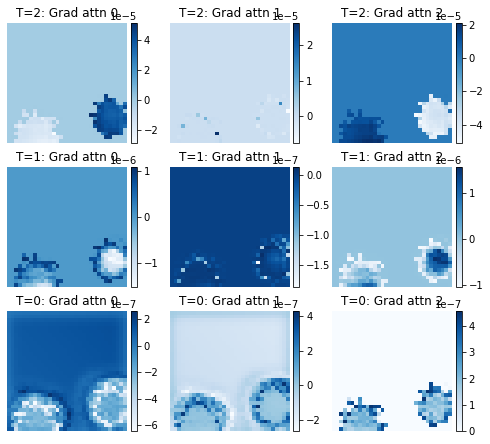

iter 12000 , loss 0.1803209 , lr 0.00025402359370875813


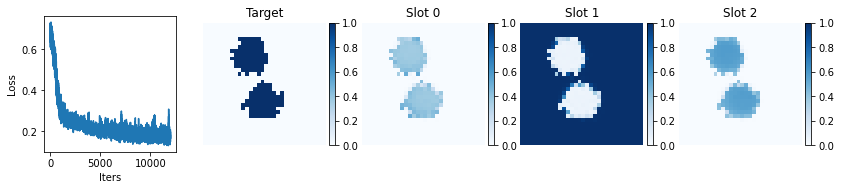

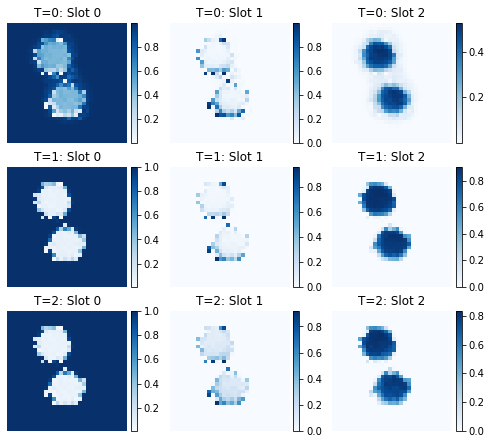

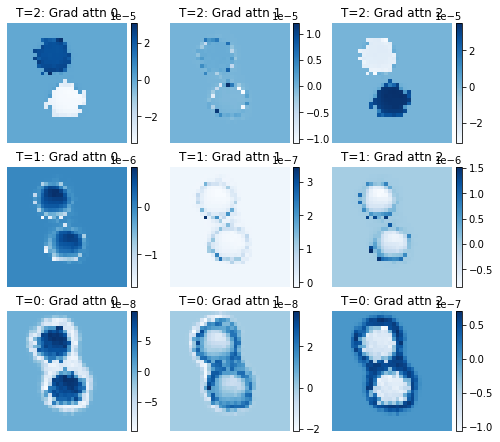

iter 12500 , loss 0.1967524 , lr 0.00025226892457611434


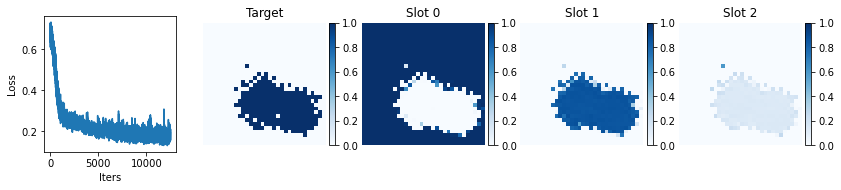

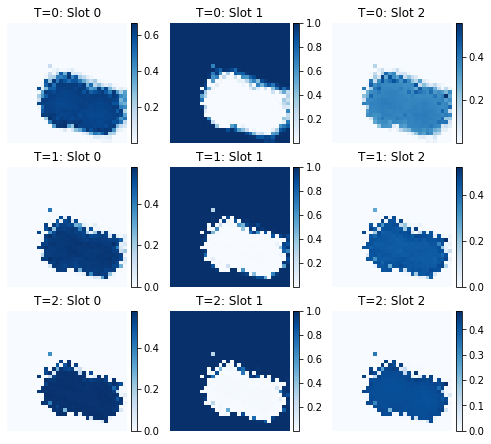

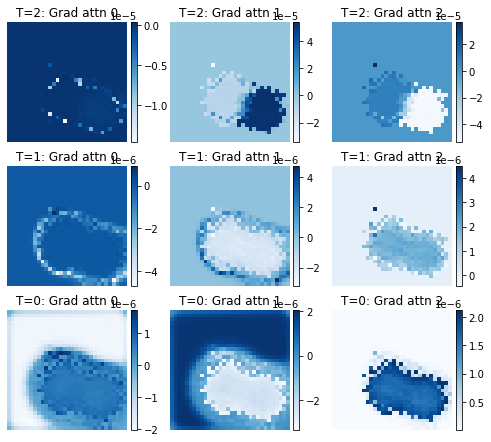

iter 13000 , loss 0.18207867 , lr 0.0002505263758285108


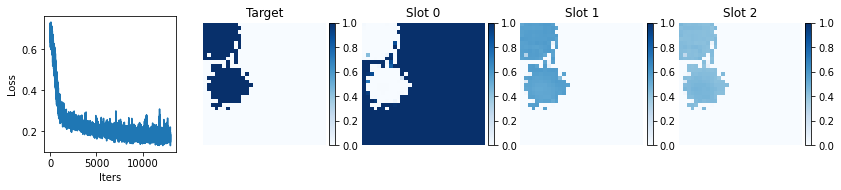

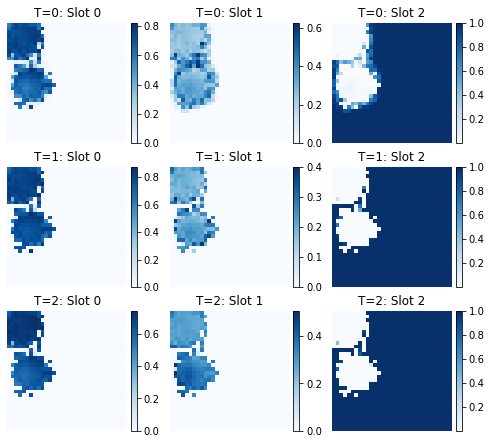

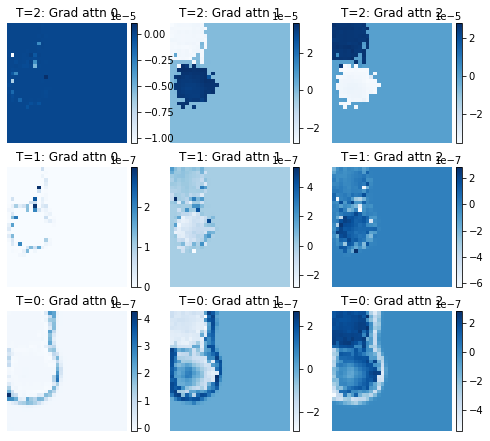

iter 13500 , loss 0.15182924 , lr 0.00024879586374433247


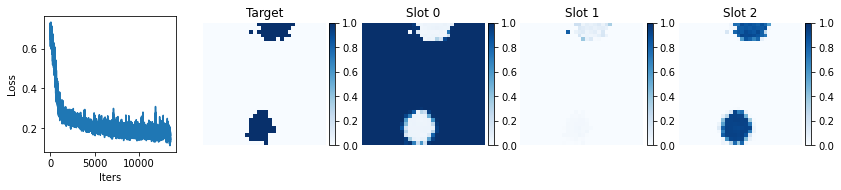

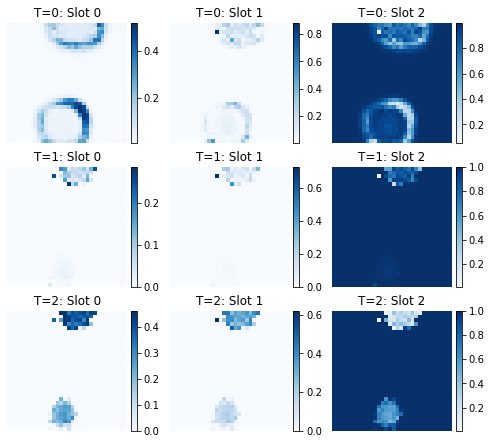

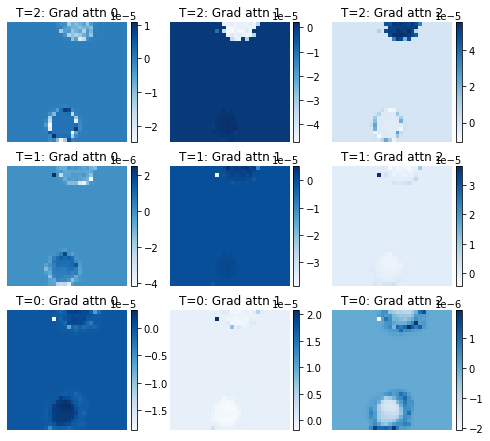

iter 14000 , loss 0.15334012 , lr 0.0002470773051802719


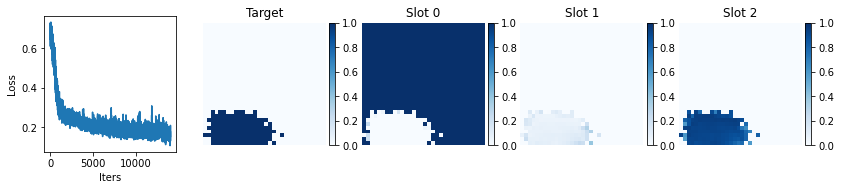

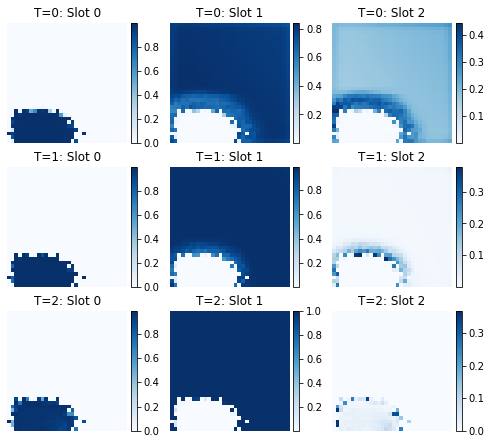

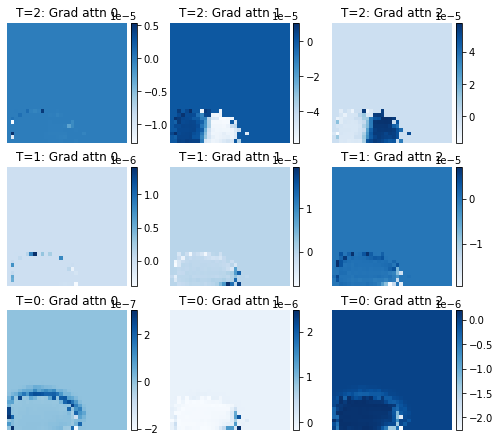

iter 14500 , loss 0.14691381 , lr 0.0002453706175673343


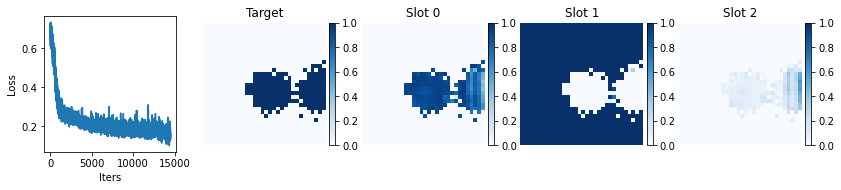

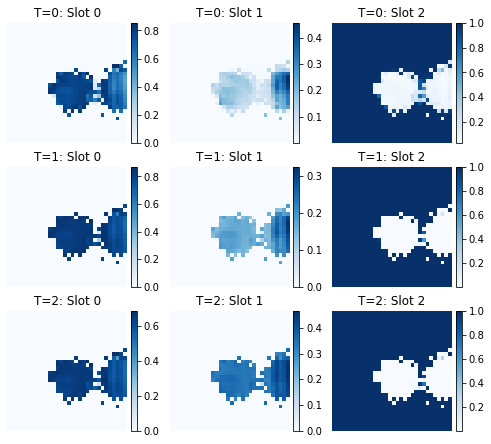

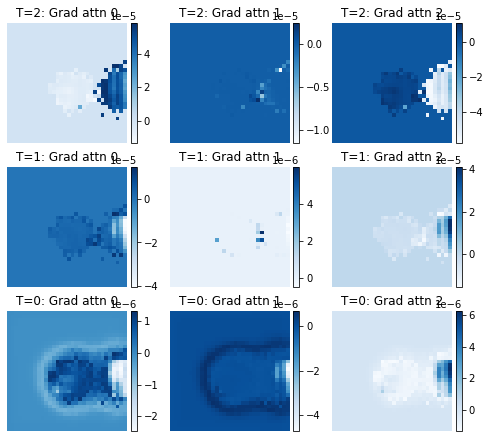

iter 15000 , loss 0.118627414 , lr 0.00024367571890687067


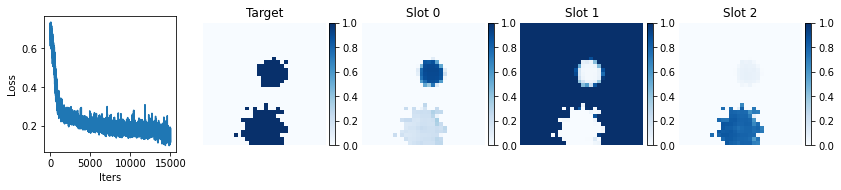

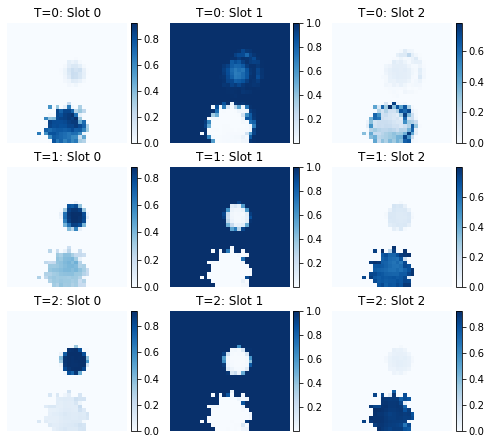

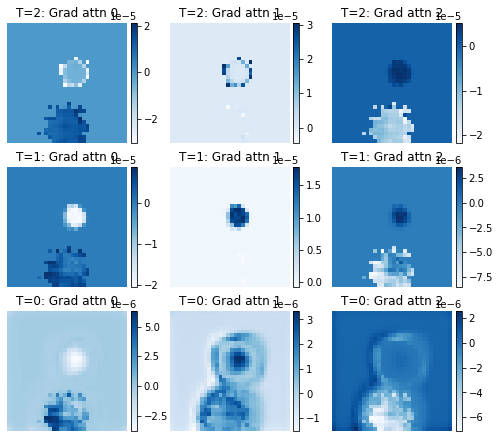

iter 15500 , loss 0.17990609 , lr 0.00024199252776663788


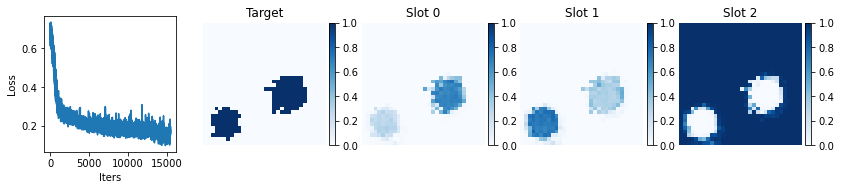

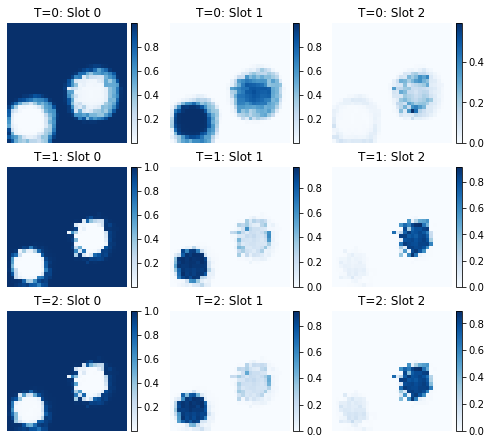

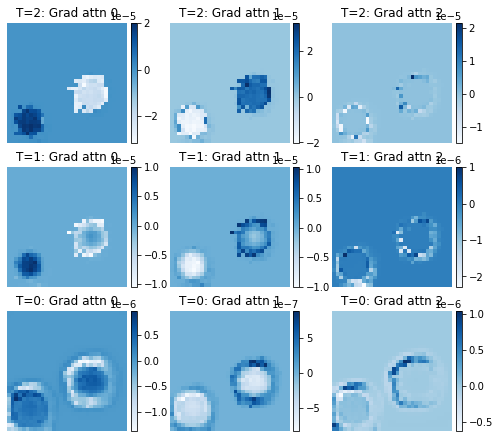

iter 16000 , loss 0.17226672 , lr 0.00024032096327688662


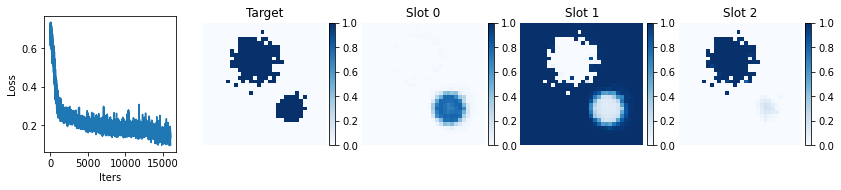

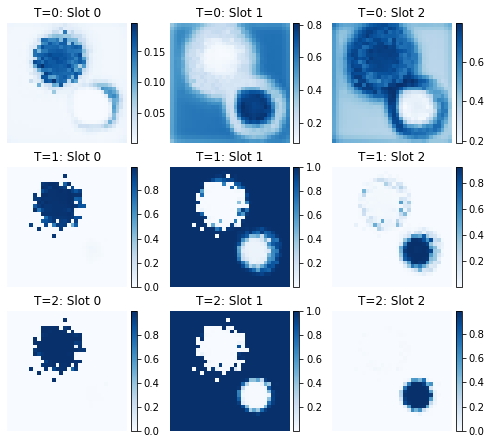

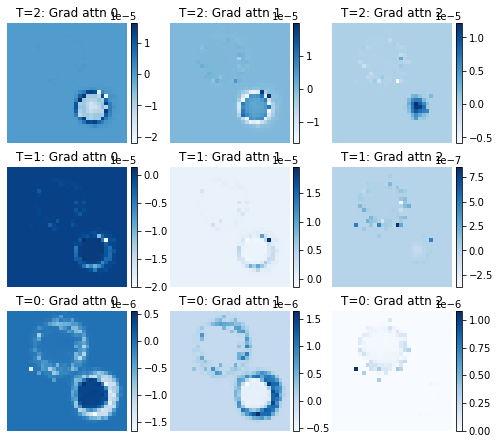

iter 16500 , loss 0.12721536 , lr 0.00023866094512647559


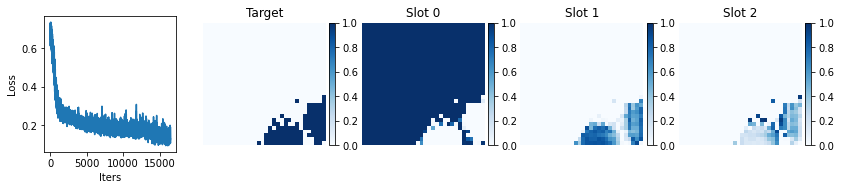

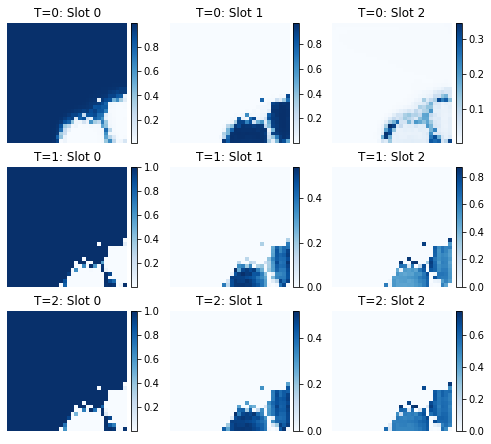

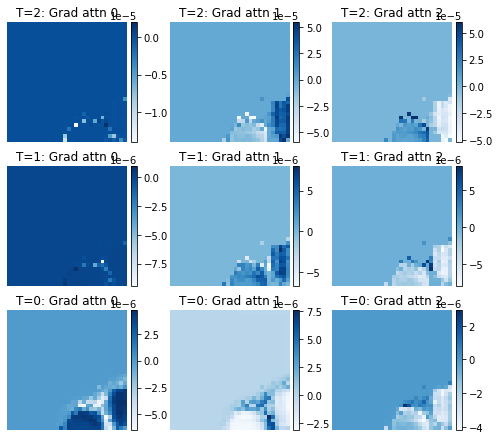

iter 17000 , loss 0.14282958 , lr 0.0002370123935590131


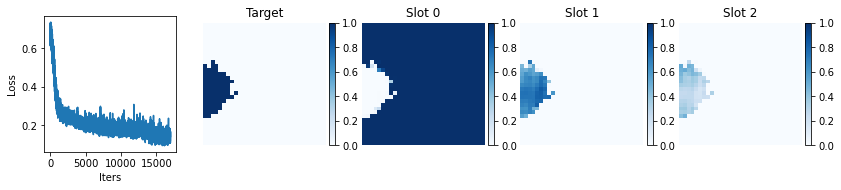

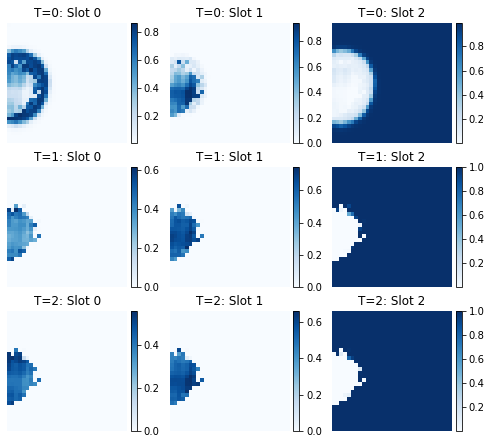

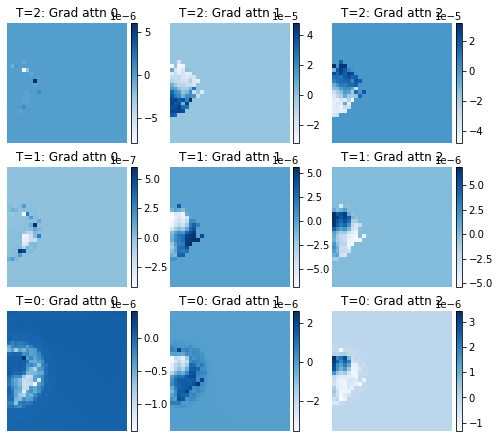

iter 17500 , loss 0.17454498 , lr 0.0002353752293690252


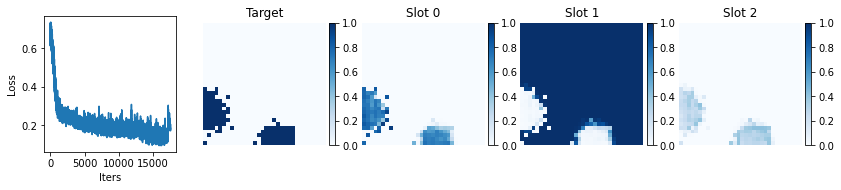

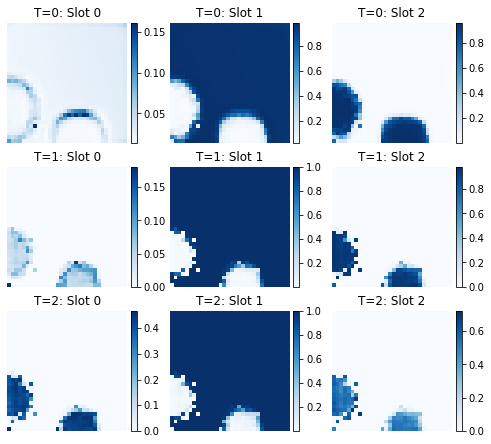

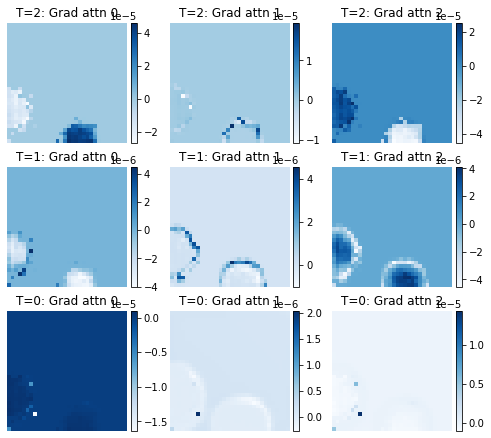

iter 18000 , loss 0.15155342 , lr 0.00023374937389814994


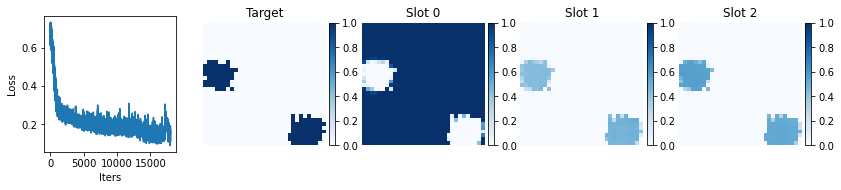

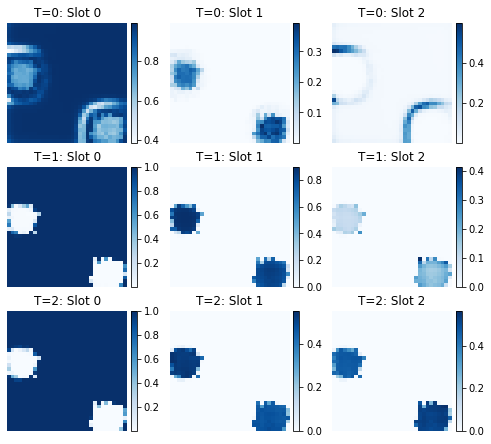

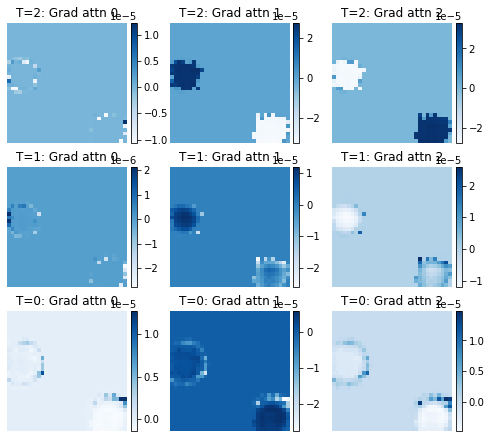

iter 18500 , loss 0.13874125 , lr 0.00023213474903135845


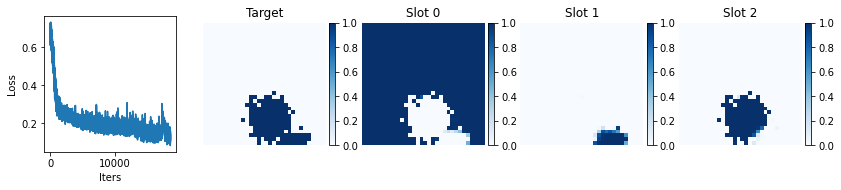

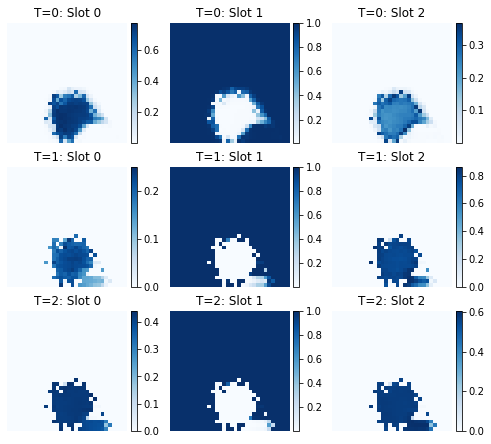

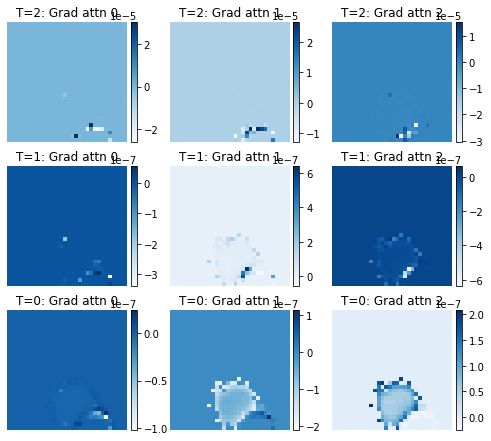

iter 19000 , loss 0.13910736 , lr 0.00023053127719320184


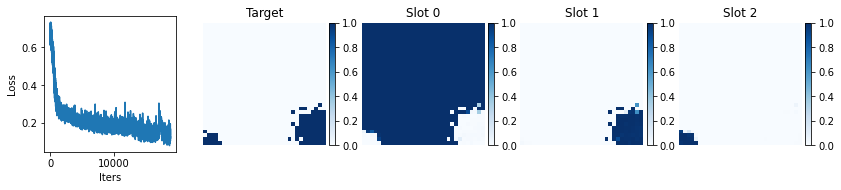

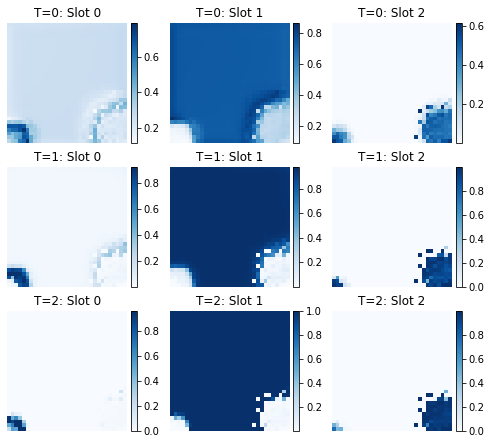

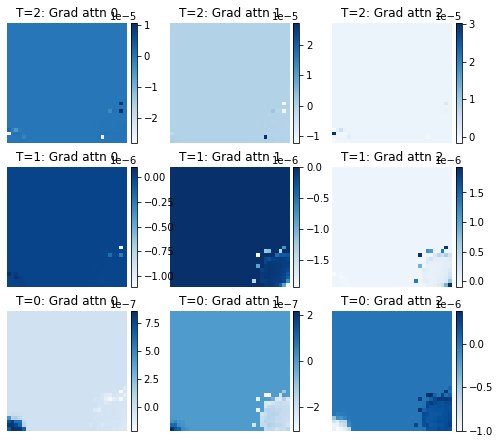

iter 19500 , loss 0.13177669 , lr 0.00022893888134408385


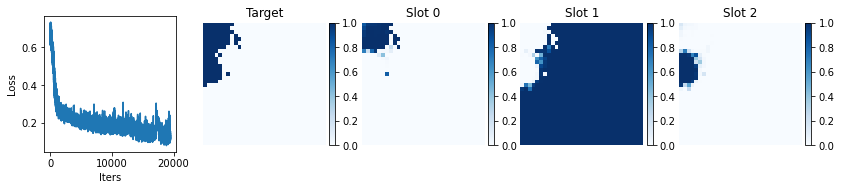

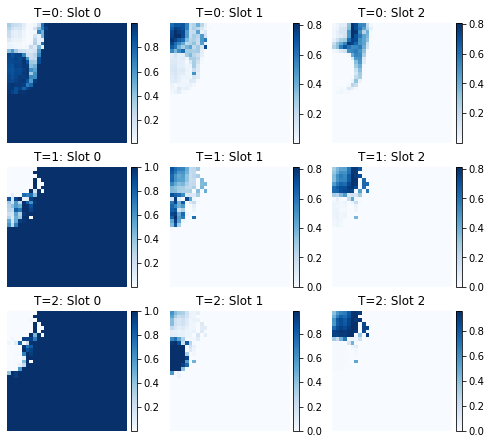

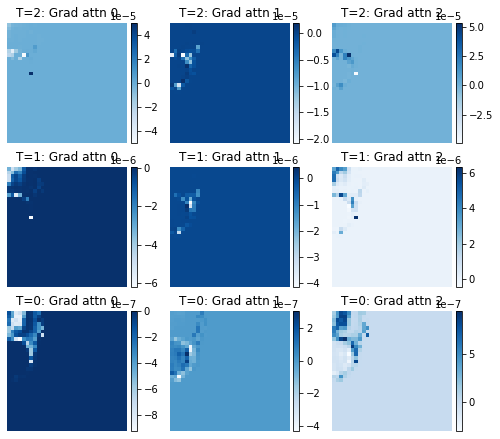

iter 20000 , loss 0.1129501 , lr 0.00022735748497655967


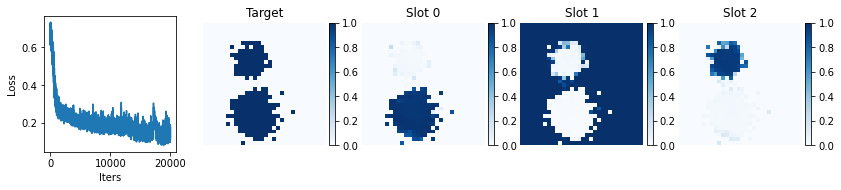

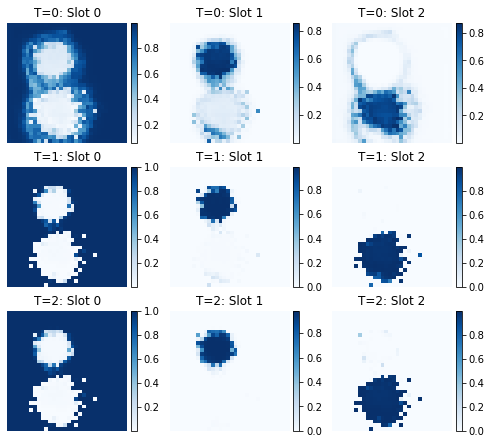

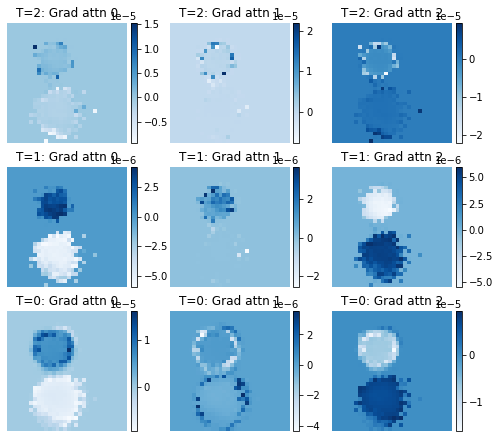

iter 20500 , loss 0.12657288 , lr 0.0002257870121116601


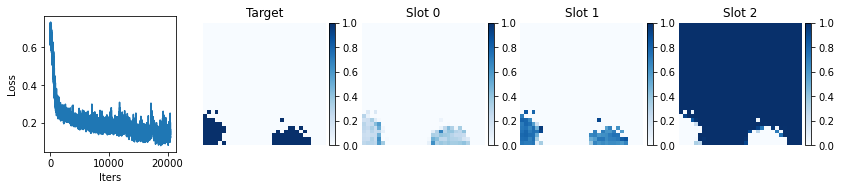

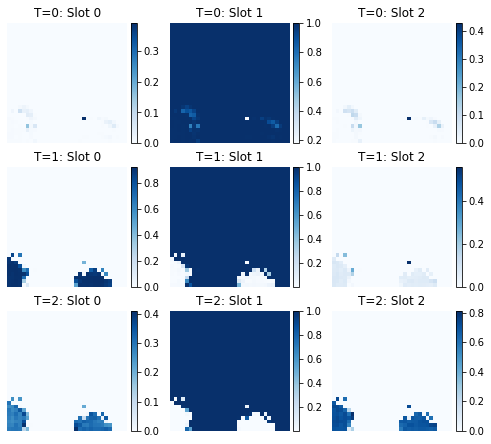

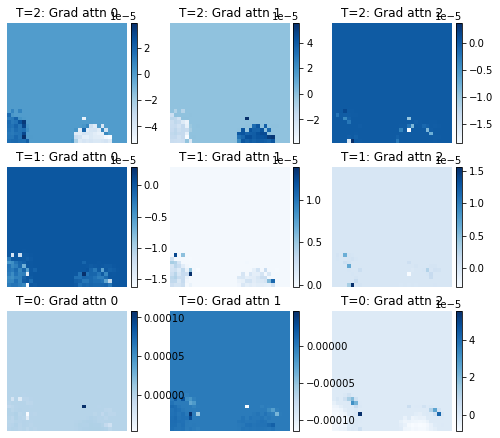

iter 21000 , loss 0.23418209 , lr 0.00022422738729524077


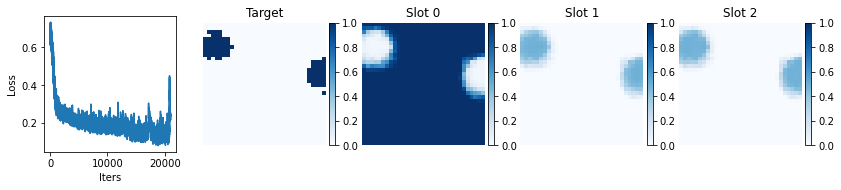

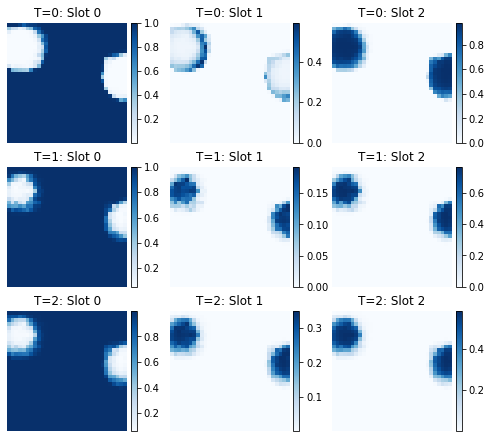

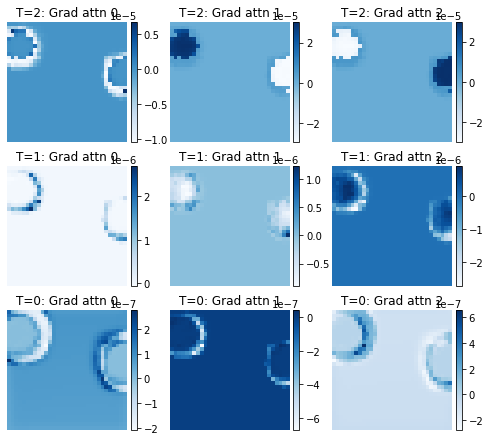

iter 21500 , loss 0.14080155 , lr 0.00022267853559435736


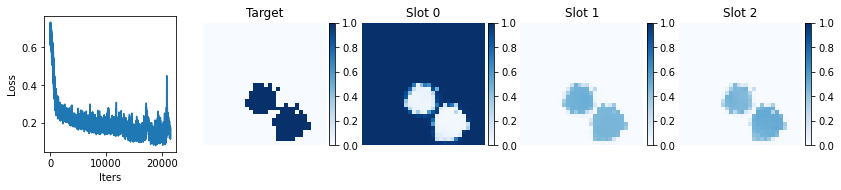

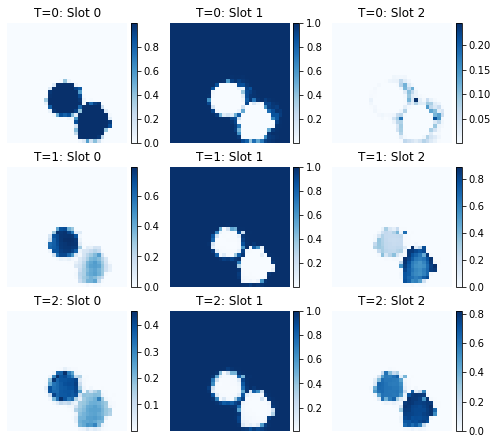

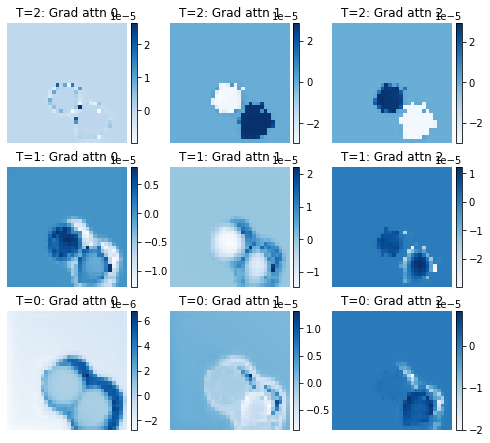

iter 22000 , loss 0.11771317 , lr 0.00022114038259366515


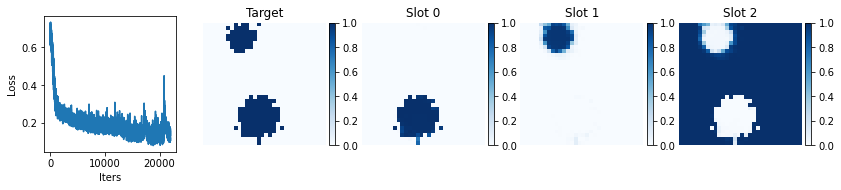

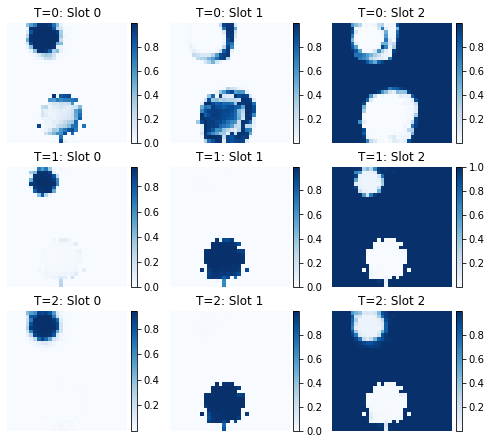

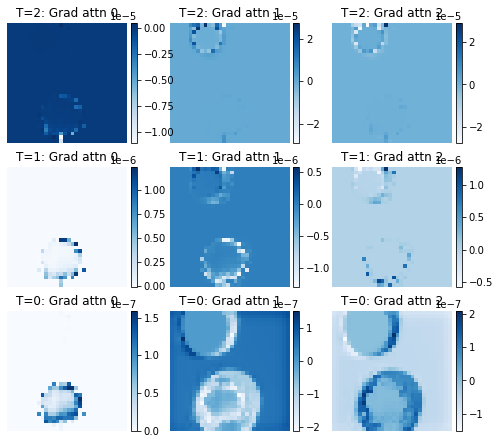

iter 22500 , loss 0.14209528 , lr 0.00021961285439184378


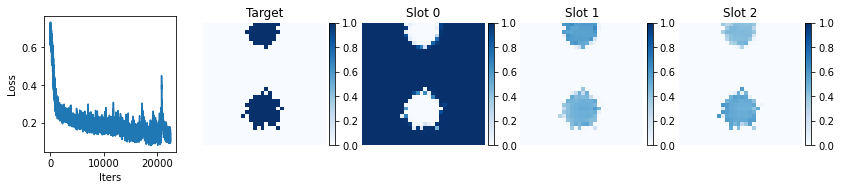

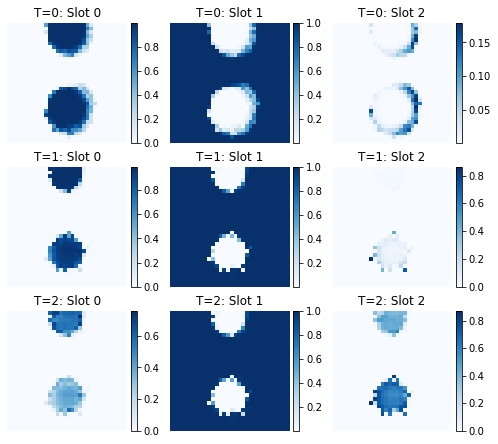

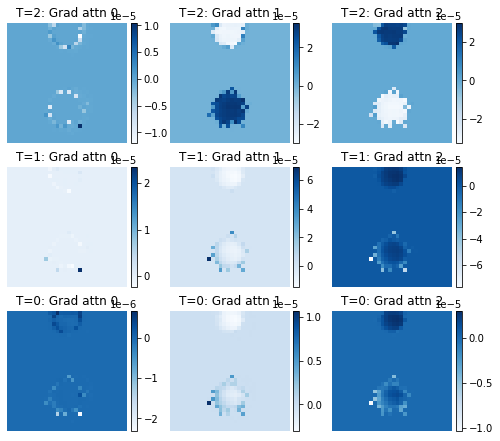

iter 23000 , loss 0.11710343 , lr 0.00021809587759804658


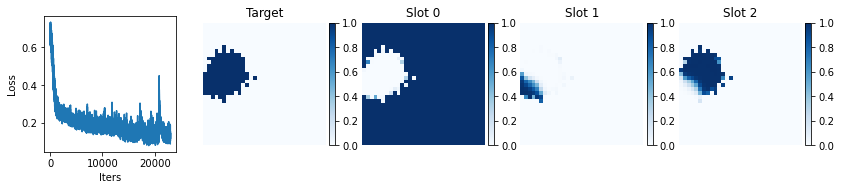

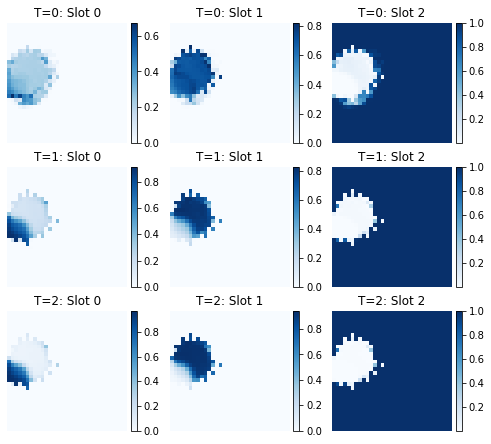

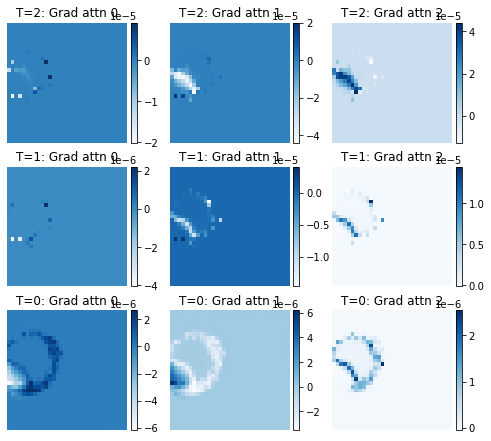

iter 23500 , loss 0.11768274 , lr 0.00021658937932837443


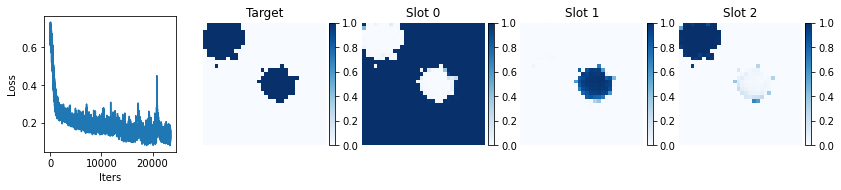

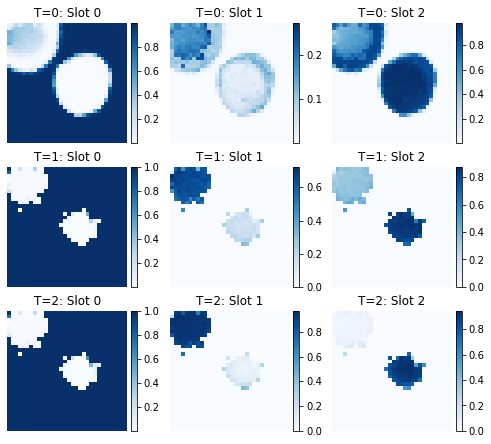

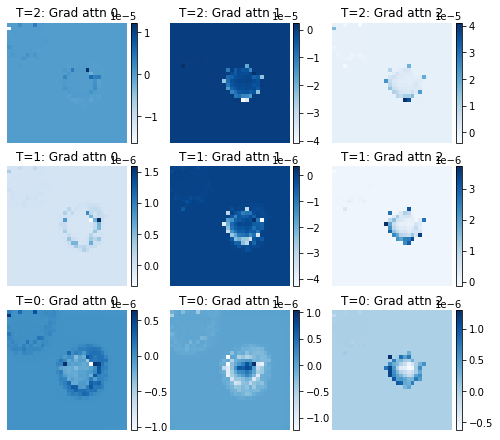

iter 24000 , loss 0.08380497 , lr 0.00021509328720237407


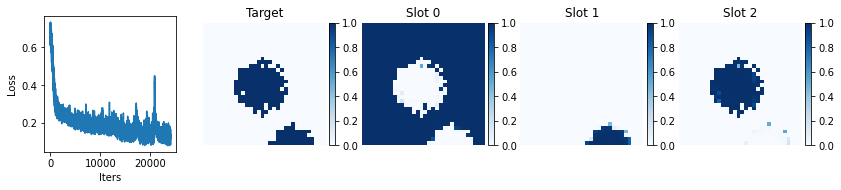

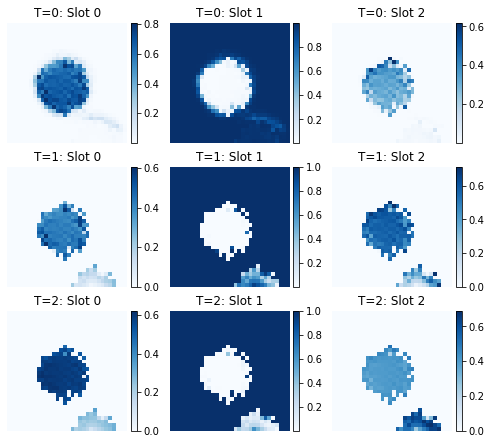

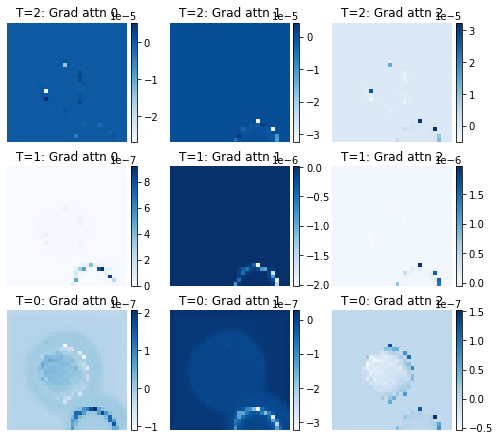

iter 24500 , loss 0.109285824 , lr 0.00021360752933956073


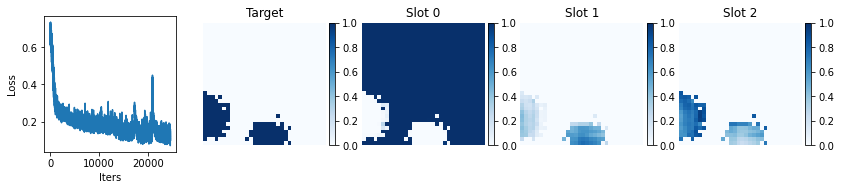

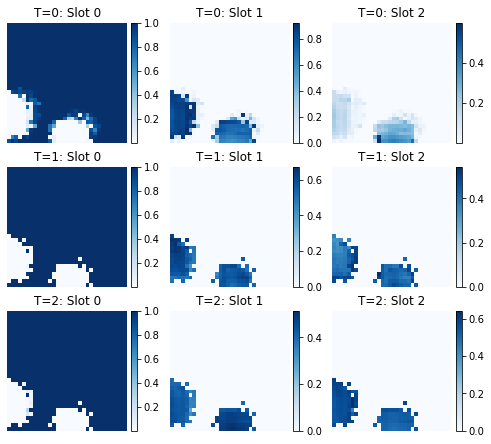

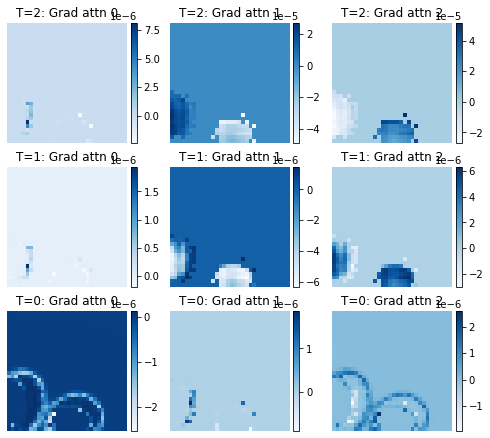

iter 25000 , loss 0.1165643 , lr 0.00021213203435596425


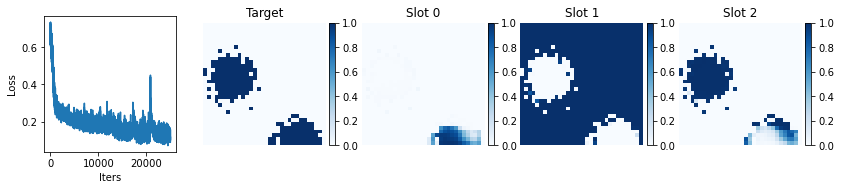

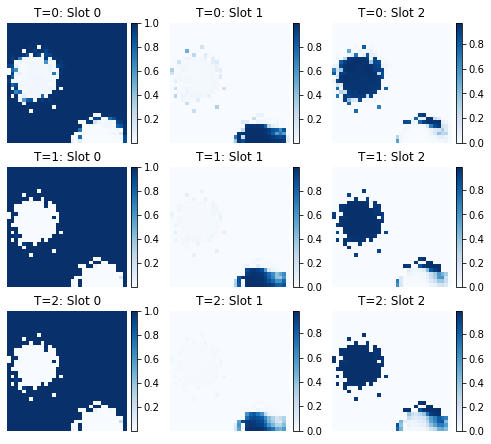

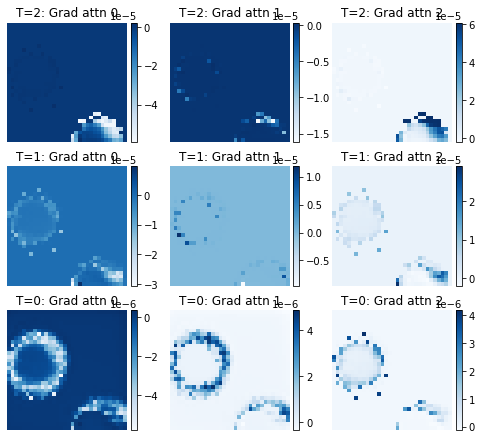

iter 25500 , loss 0.09826356 , lr 0.00021066673136069957


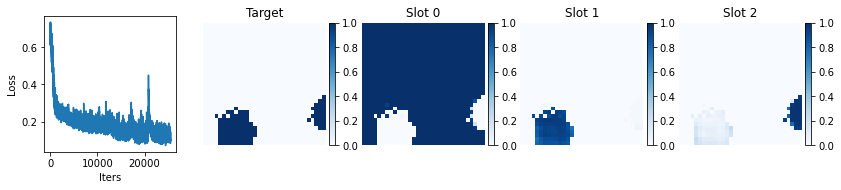

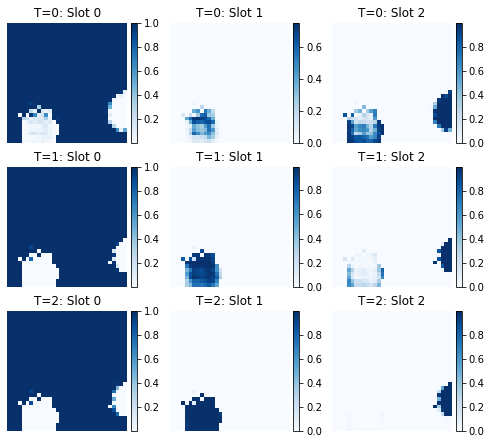

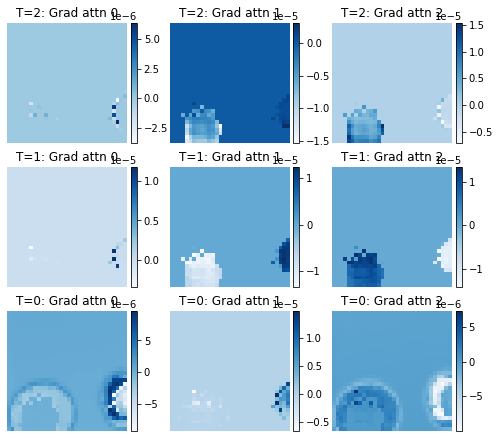

iter 26000 , loss 0.10105857 , lr 0.00020921154995256079


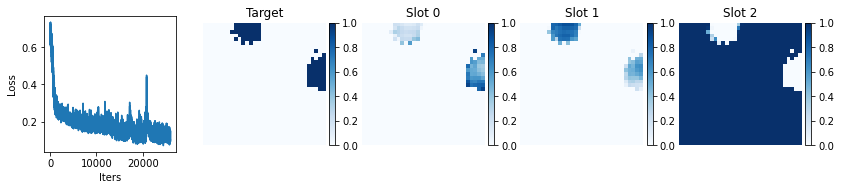

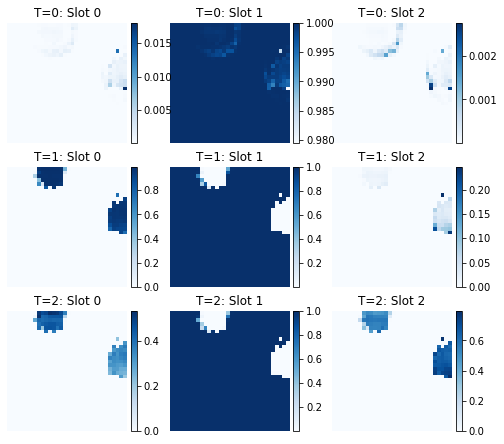

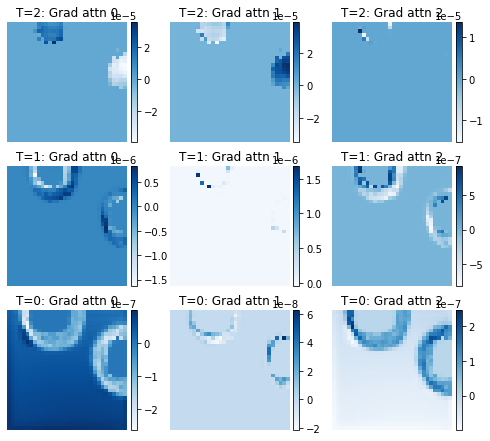

iter 26500 , loss 0.1246749 , lr 0.00020776642021663868


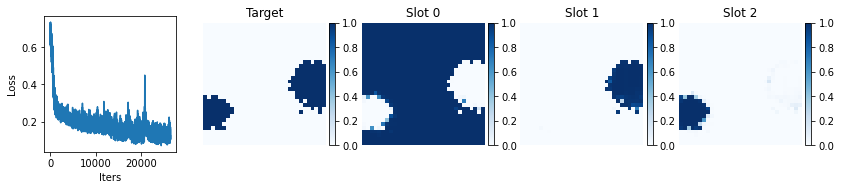

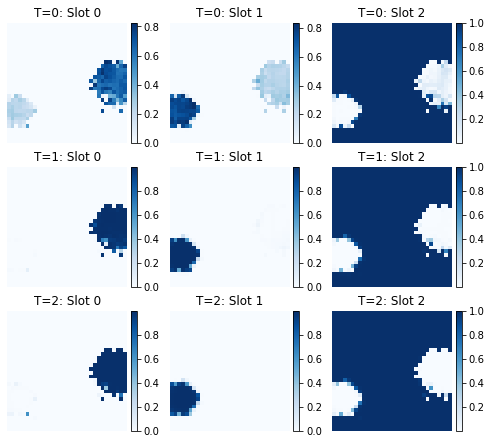

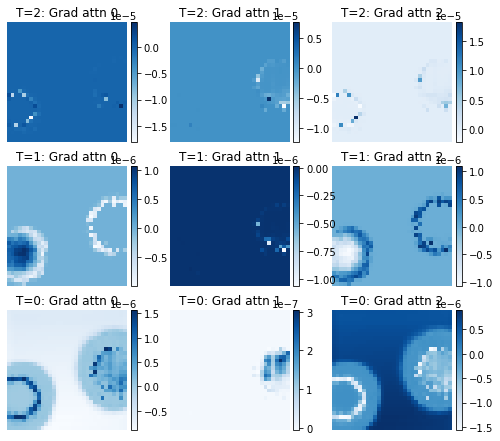

iter 27000 , loss 0.14607623 , lr 0.00020633127272096154


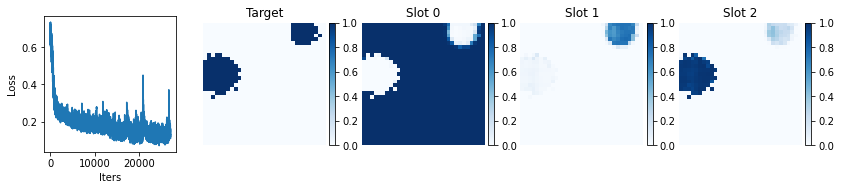

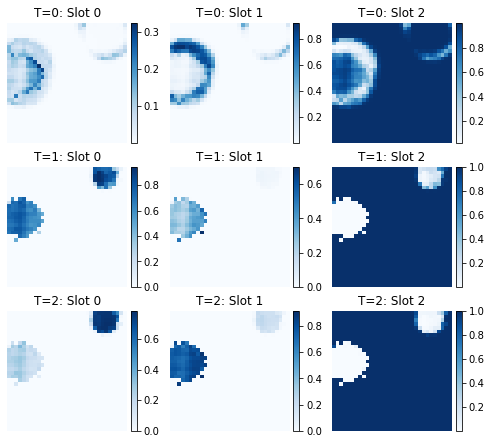

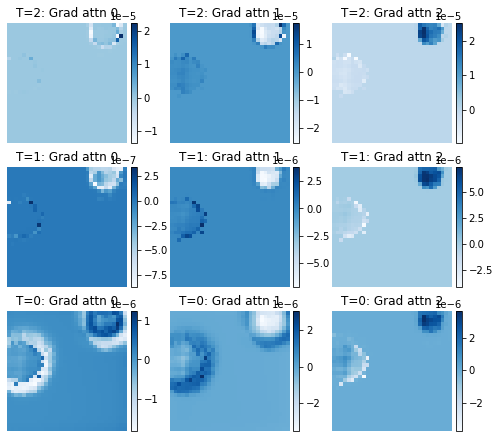

iter 27500 , loss 0.15418994 , lr 0.0002049060385131593


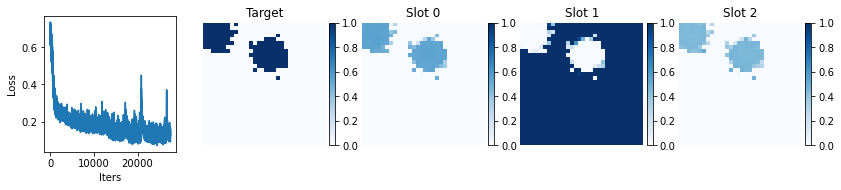

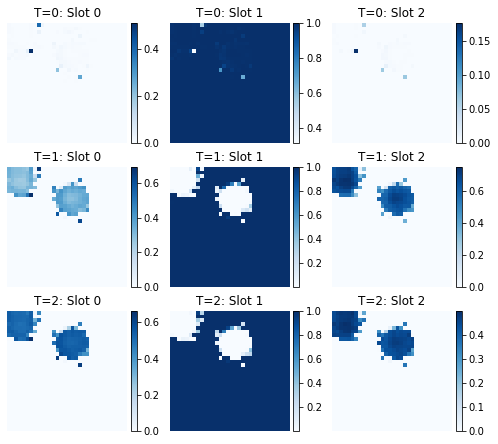

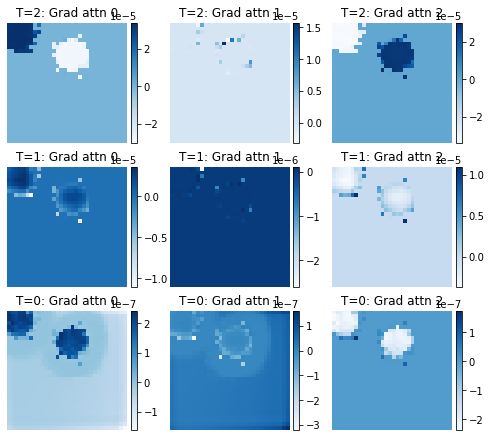

iter 28000 , loss 0.118852995 , lr 0.00020349064911715076


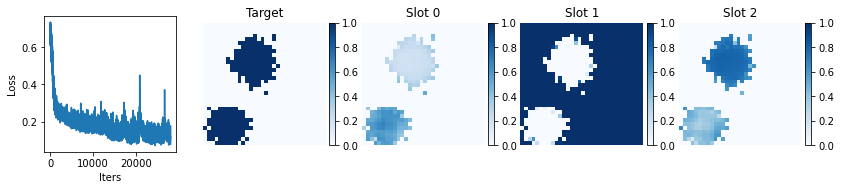

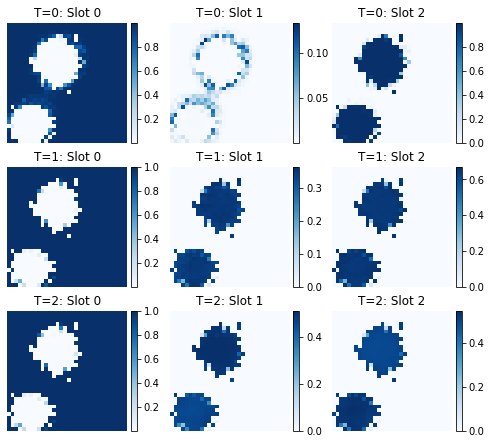

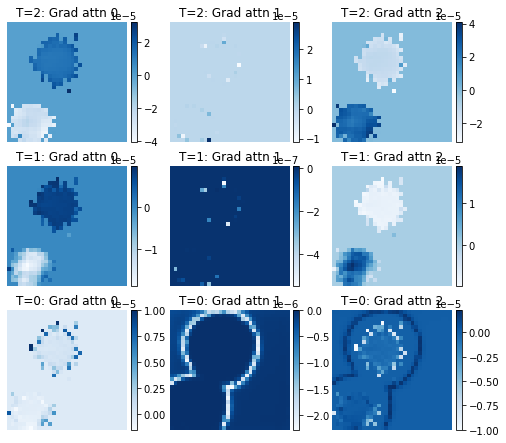

iter 28500 , loss 0.1602514 , lr 0.0002020850365298535


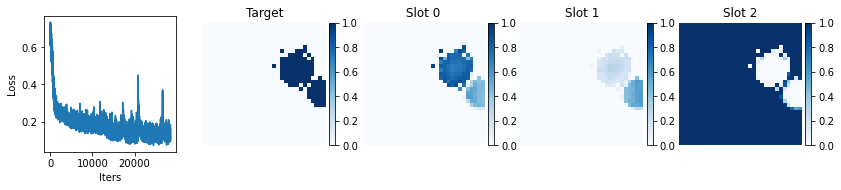

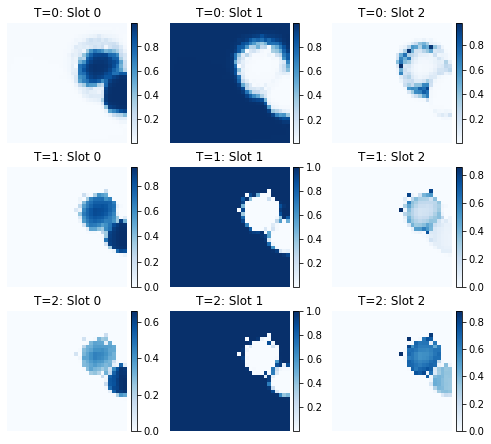

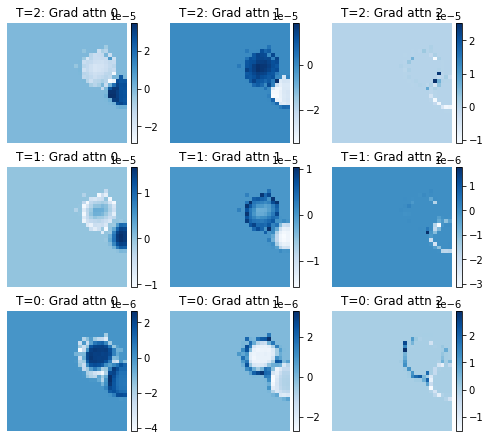

iter 29000 , loss 0.13059938 , lr 0.00020068913321791678


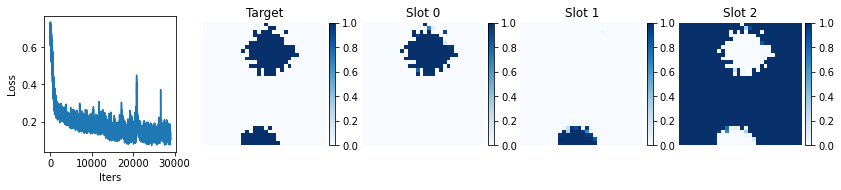

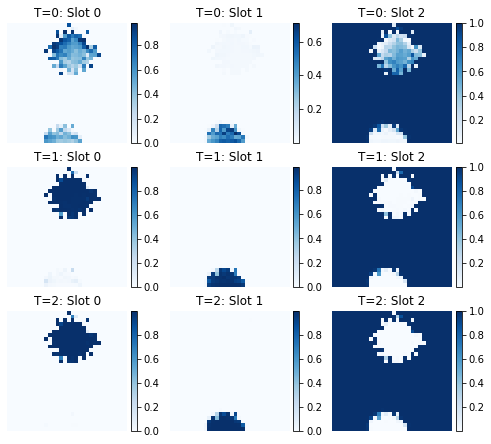

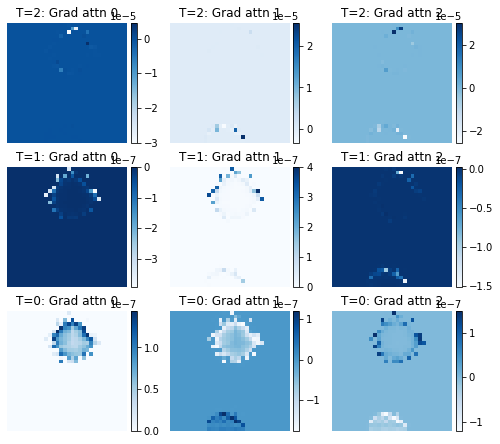

iter 29500 , loss 0.14663103 , lr 0.00019930287211447674


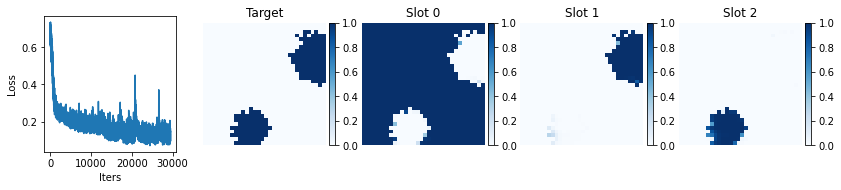

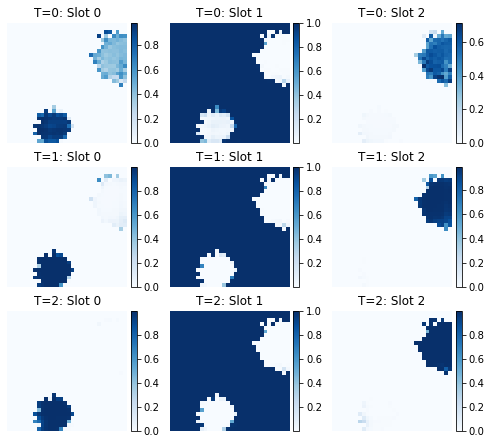

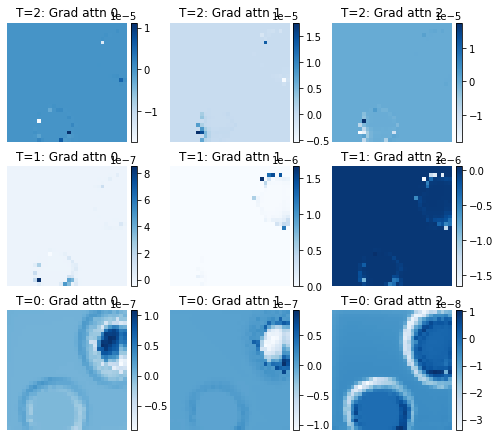

iter 30000 , loss 0.091848165 , lr 0.00019792618661593412


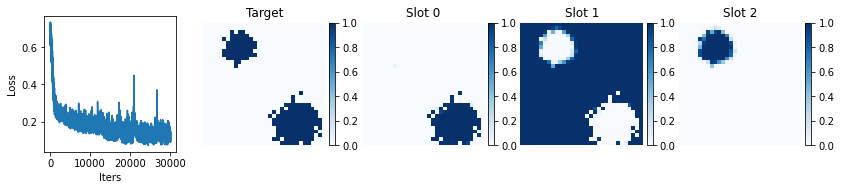

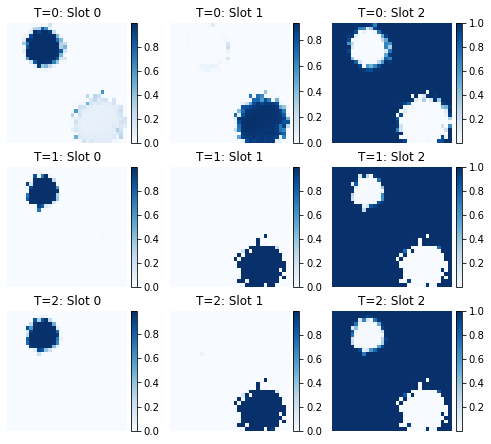

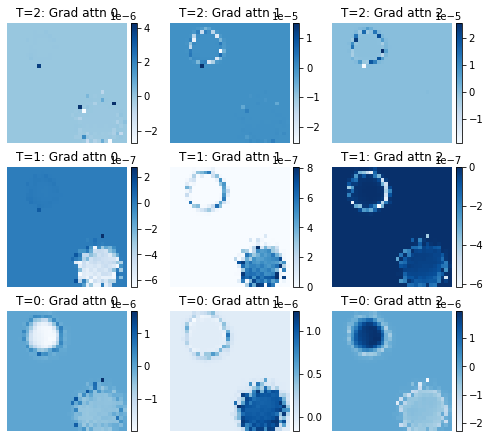

iter 30500 , loss 0.14597952 , lr 0.0001965590105787545


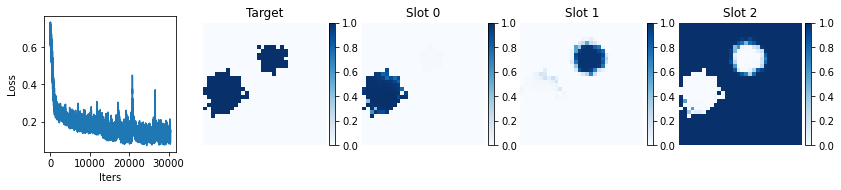

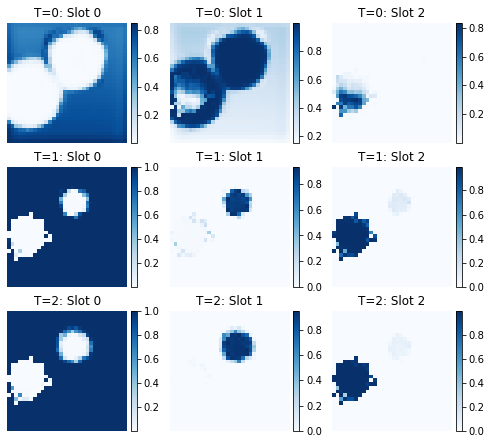

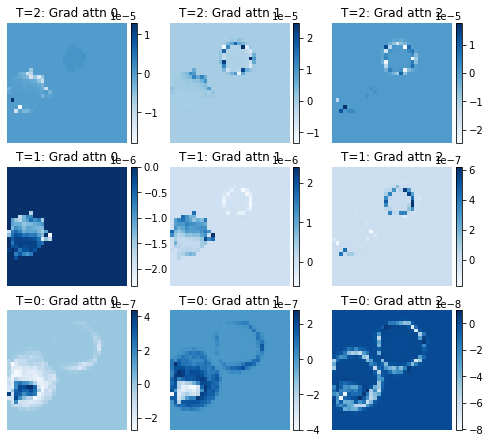

iter 31000 , loss 0.13391003 , lr 0.00019520127831629003


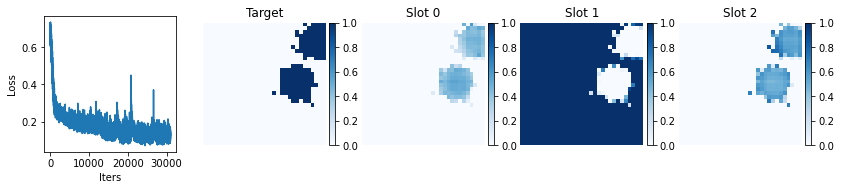

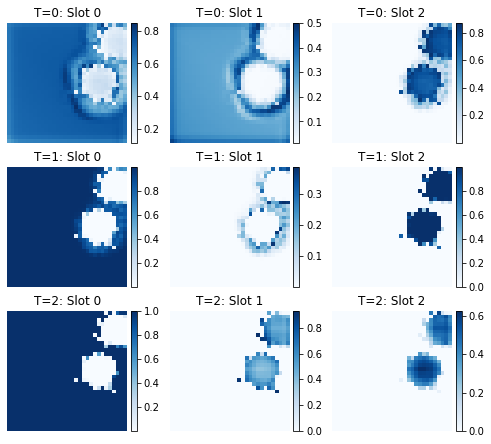

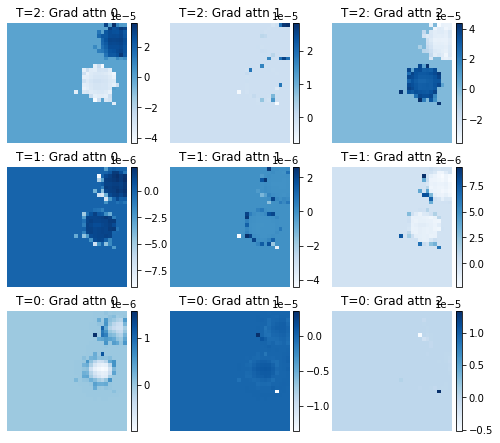

iter 31500 , loss 0.17626747 , lr 0.00019385292459562383


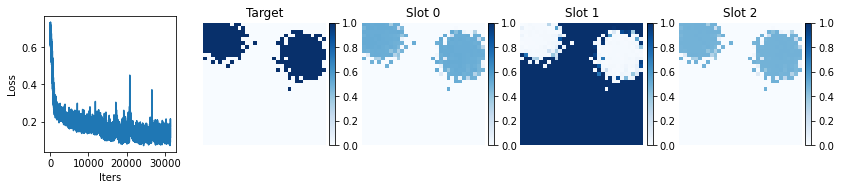

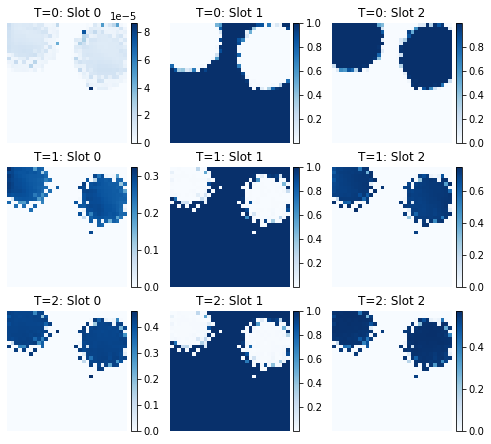

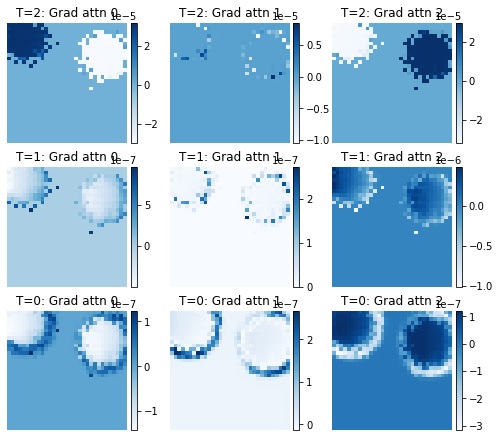

iter 32000 , loss 0.13070813 , lr 0.00019251388463443562


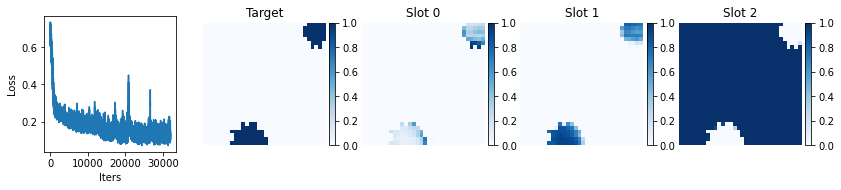

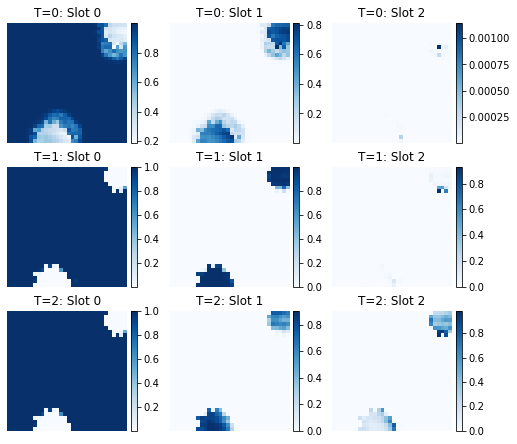

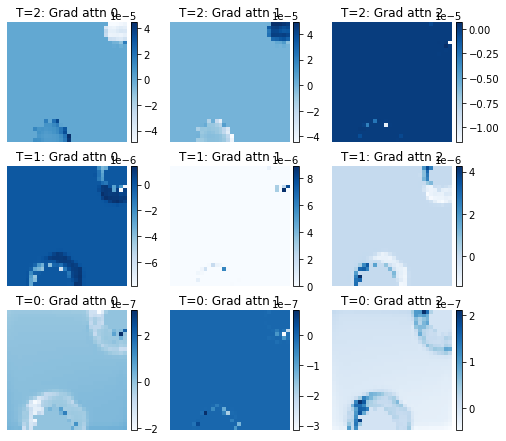

iter 32500 , loss 0.13445872 , lr 0.00019118409409788932


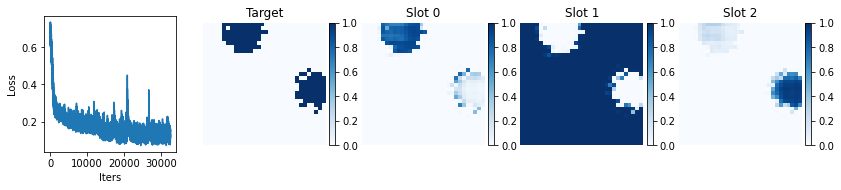

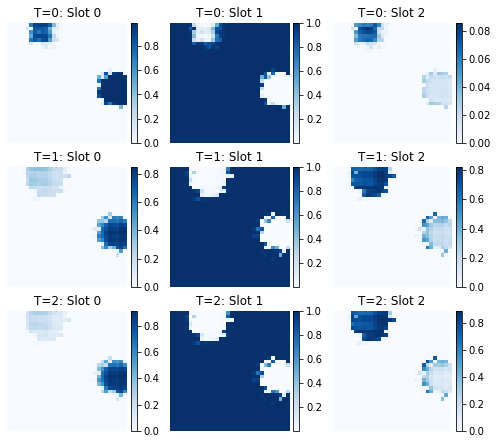

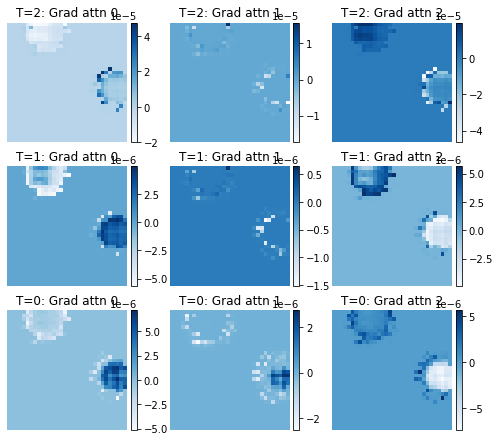

iter 33000 , loss 0.13784572 , lr 0.00018986348909554197


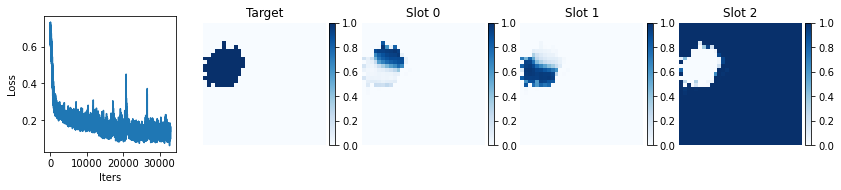

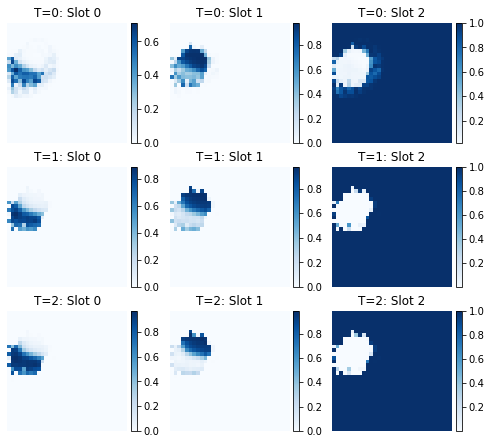

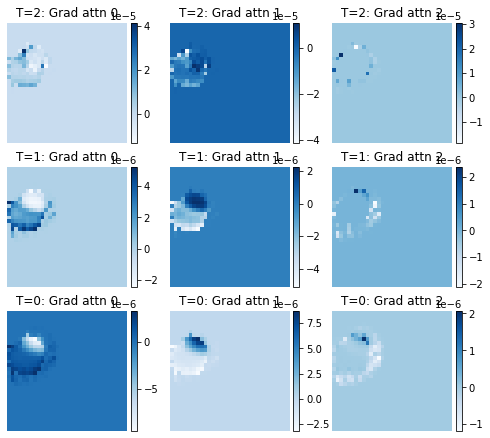

iter 33500 , loss 0.1305923 , lr 0.00018855200617827423


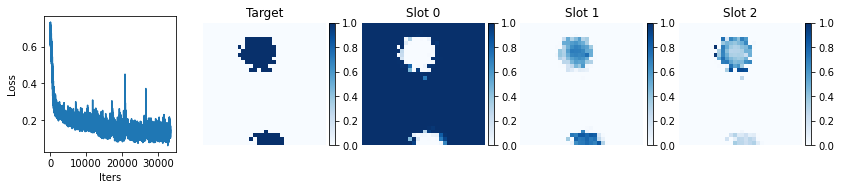

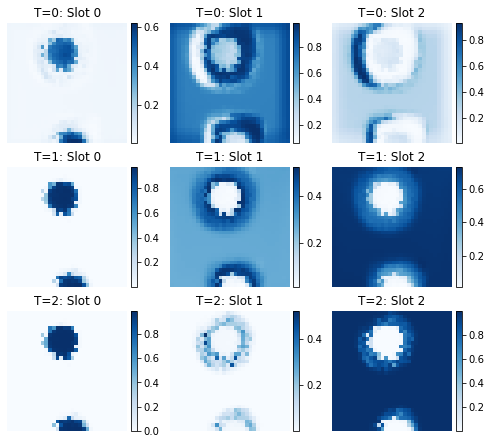

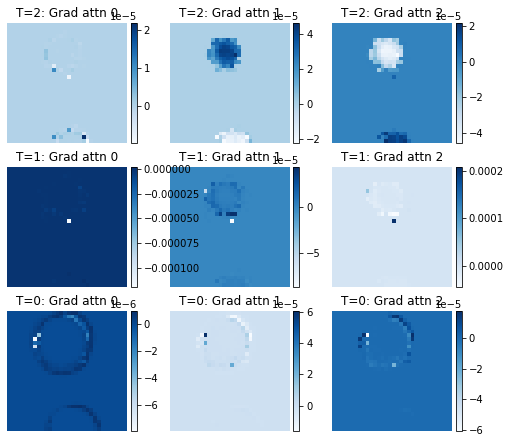

iter 34000 , loss 0.11594176 , lr 0.00018724958233524178


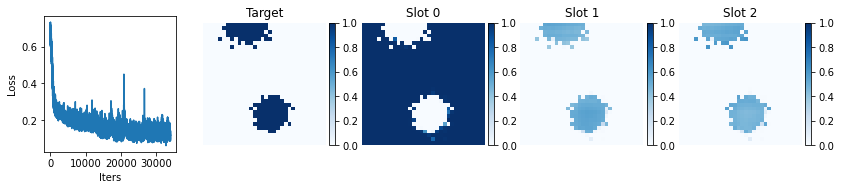

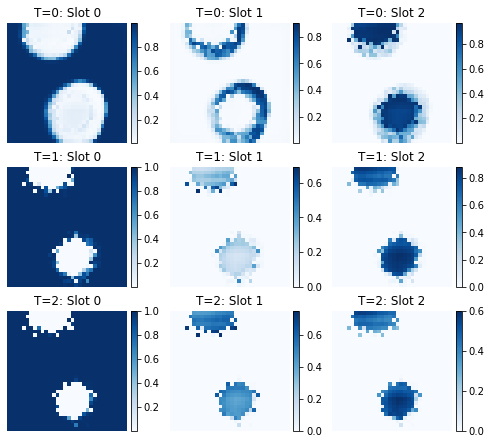

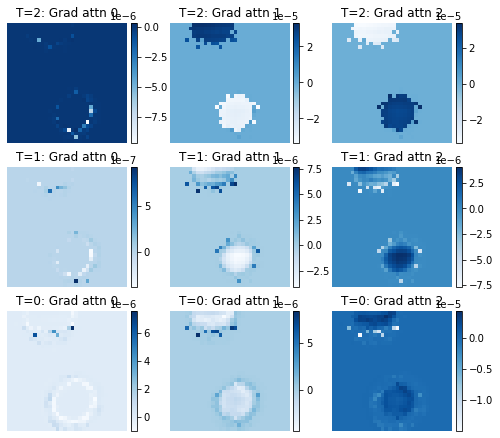

iter 34500 , loss 0.18390182 , lr 0.000185956154990848


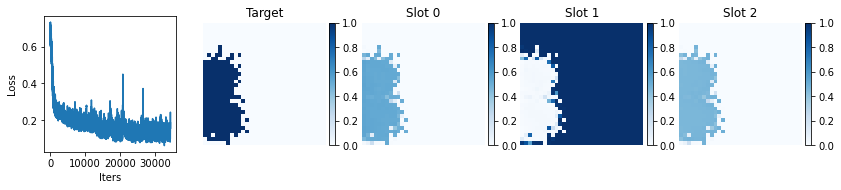

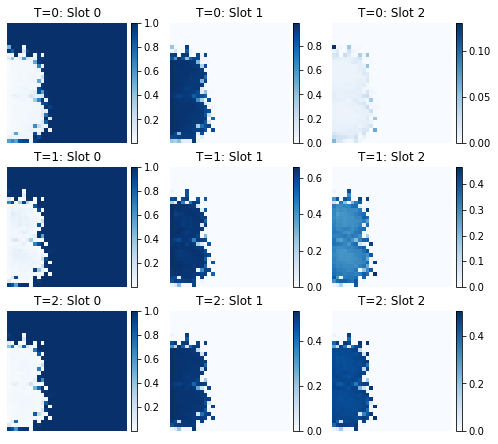

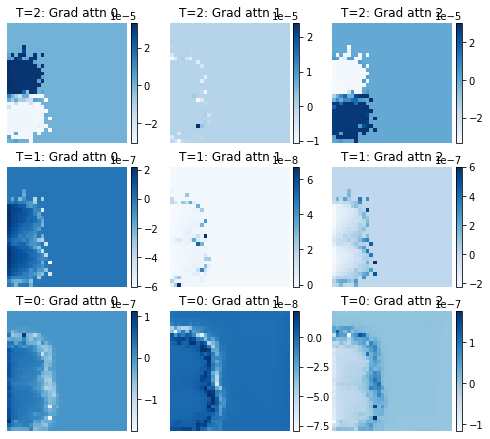

iter 35000 , loss 0.13544163 , lr 0.00018467166200173744


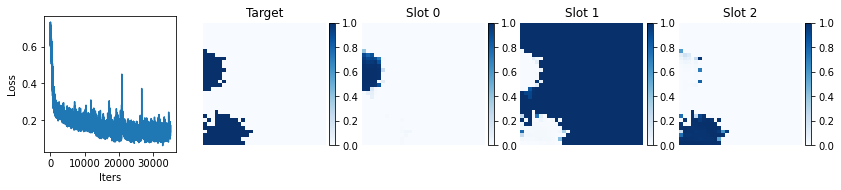

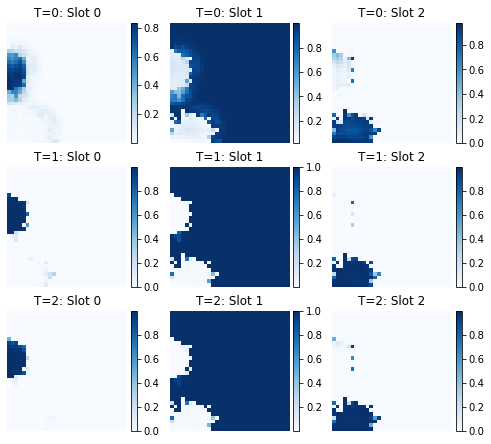

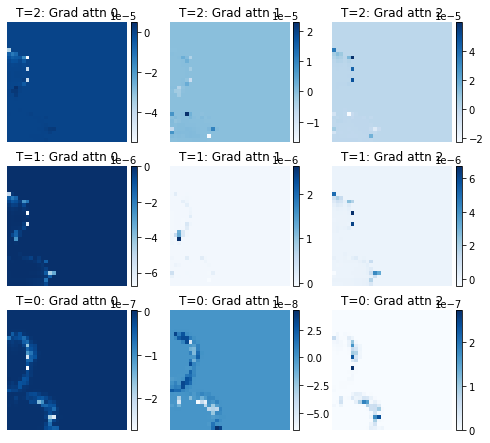

iter 35500 , loss 0.094452515 , lr 0.0001833960416538103


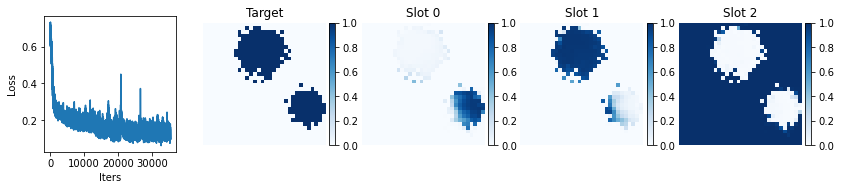

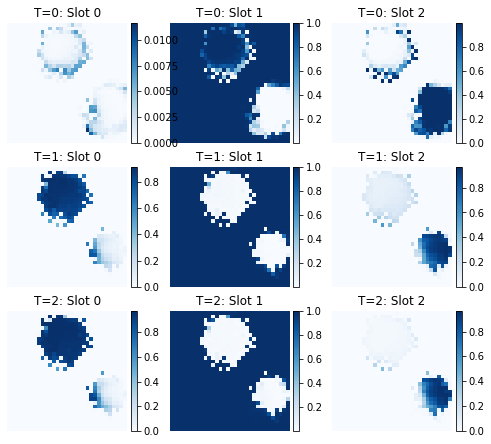

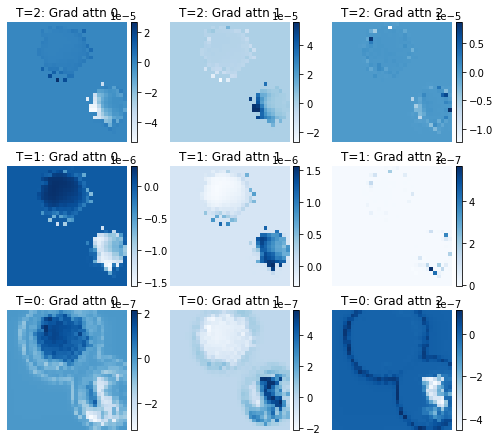

iter 36000 , loss 0.12635434 , lr 0.00018212923265925702


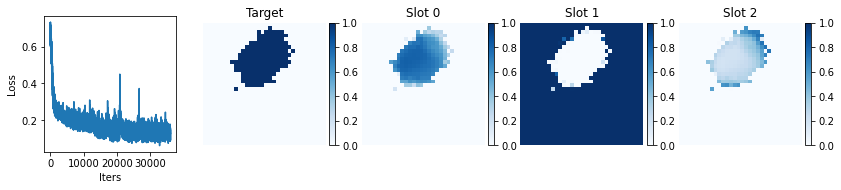

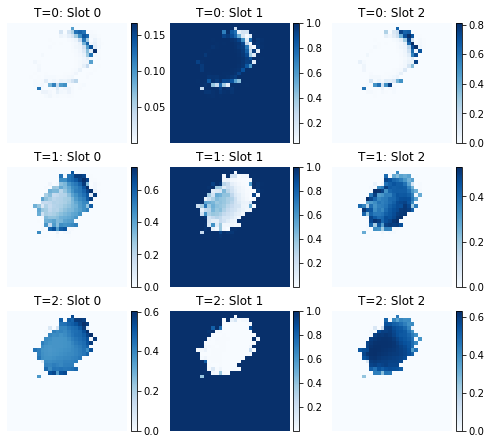

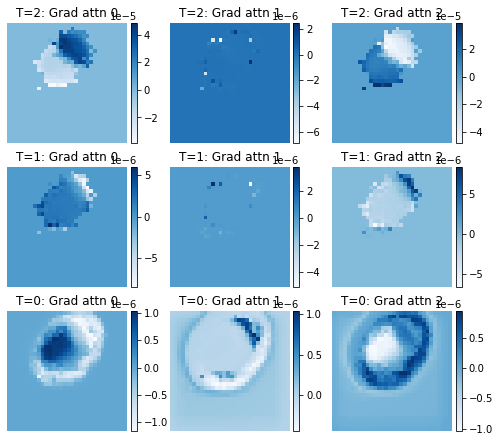

iter 36500 , loss 0.13802773 , lr 0.00018087117415361404


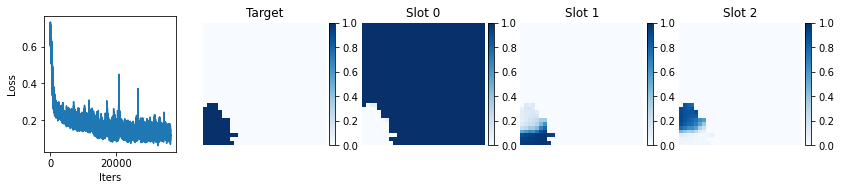

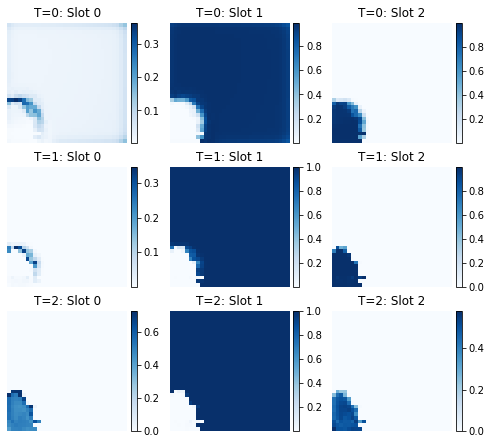

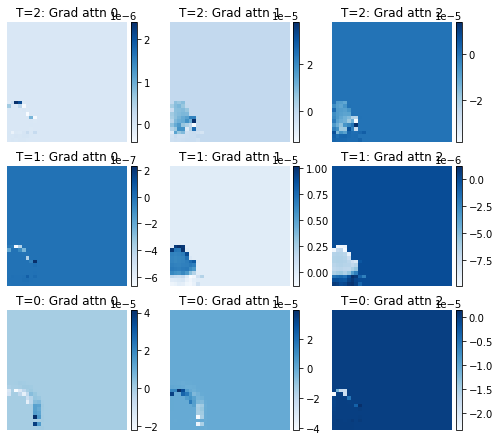

iter 37000 , loss 0.11143811 , lr 0.00017962180569283928


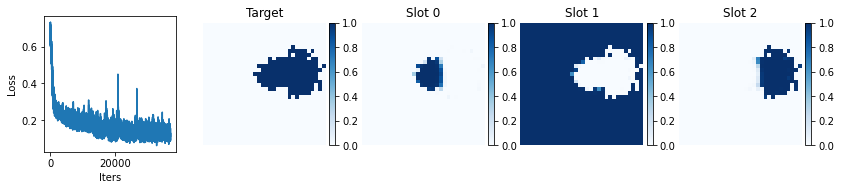

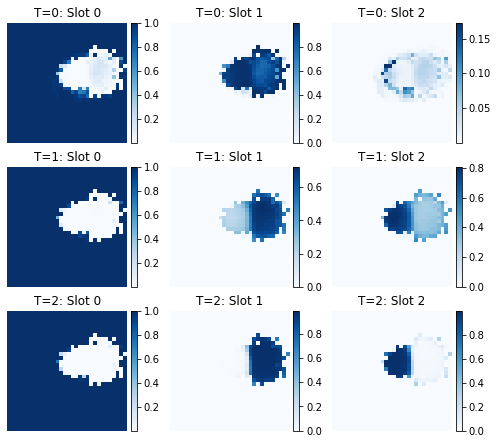

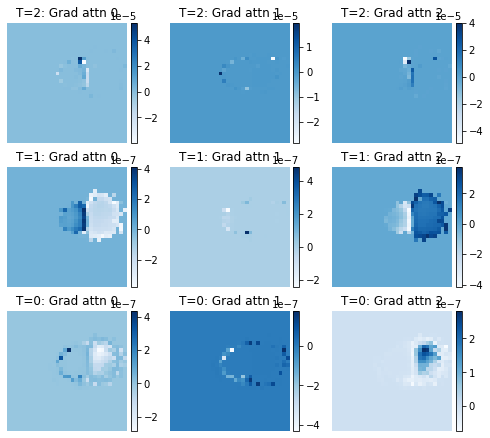

iter 37500 , loss 0.118772276 , lr 0.00017838106725040815


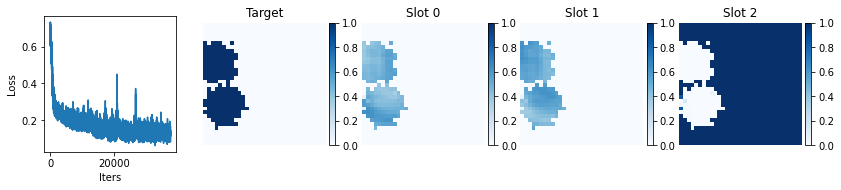

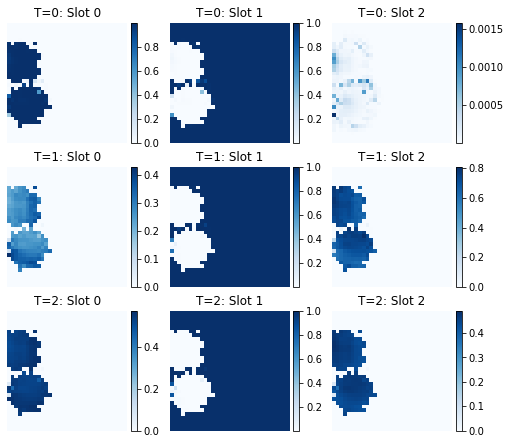

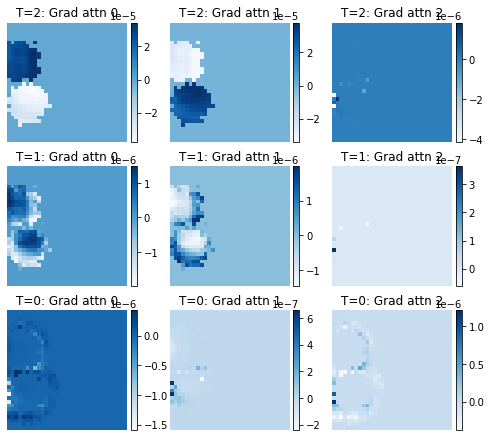

iter 38000 , loss 0.102037326 , lr 0.00017714889921442953


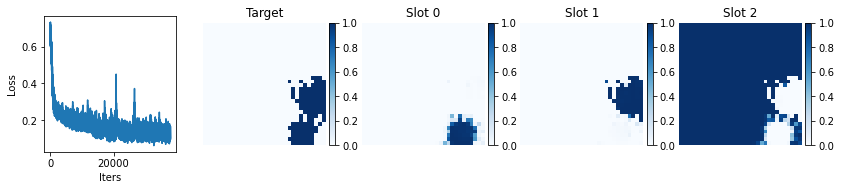

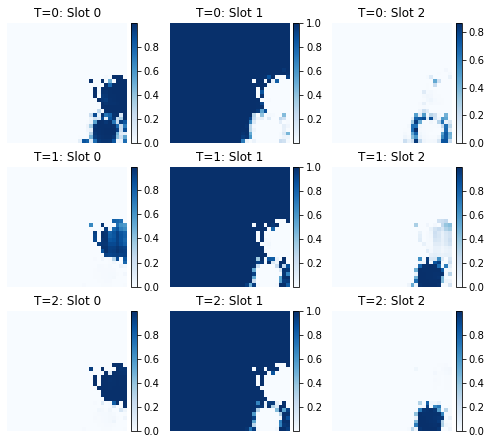

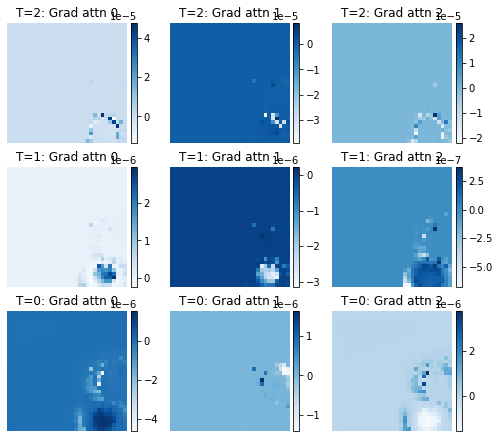

iter 38500 , loss 0.104853384 , lr 0.0001759252423847818


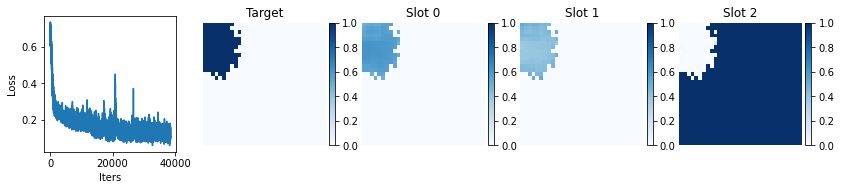

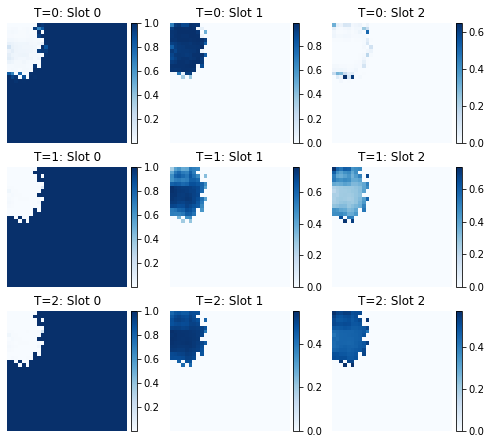

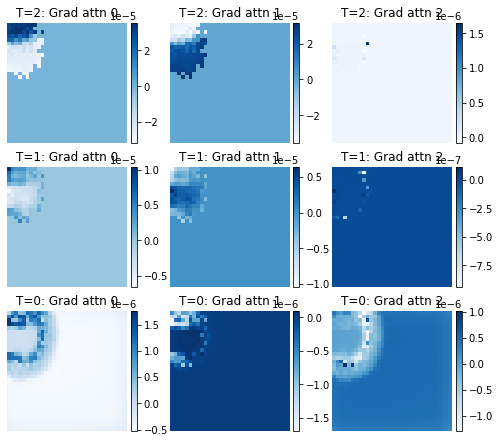

iter 39000 , loss 0.13880141 , lr 0.00017471003797026835


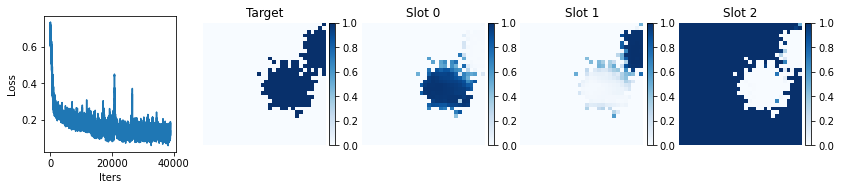

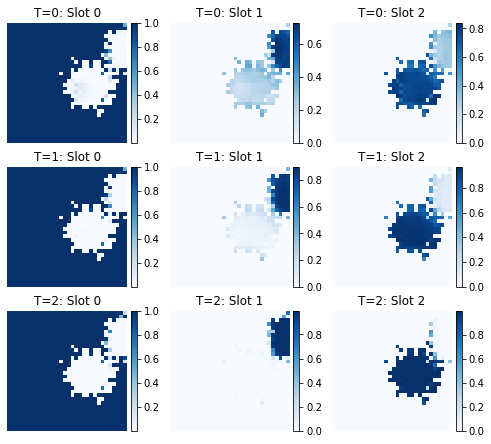

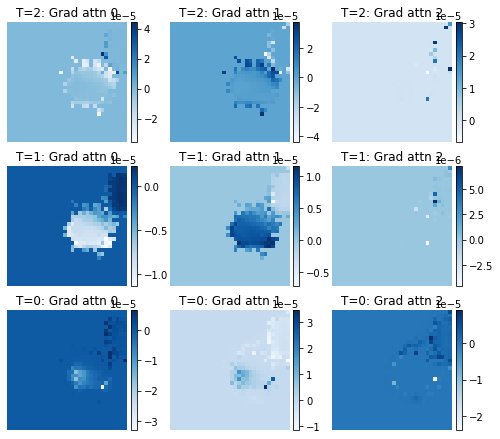

iter 39500 , loss 0.098456204 , lr 0.0001735032275857931


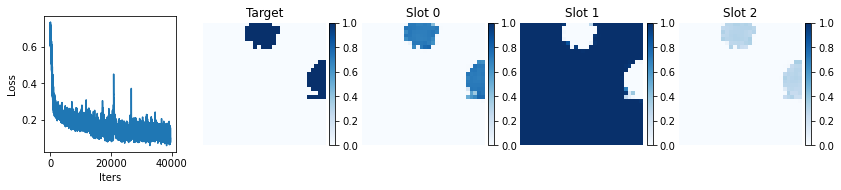

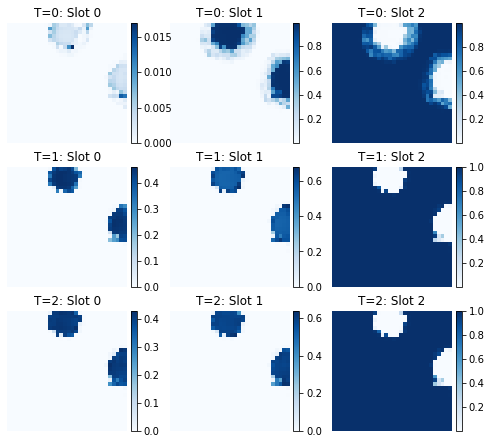

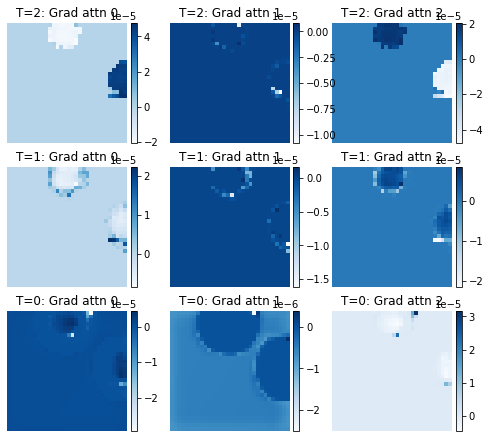

In [84]:
bs = 32

model = SlotAttentionPosEmbed(k_slots=k_slots,device=device,hidden_dim=16,query_dim=16).to(device)

model,L = train(model, 40_000,bs=bs,device=device,plot_every=500, kwargs=kwargs,
                modelDir=modelDir,figDir=figDir)

**Save the loss curves and the checkpointed model to a place**

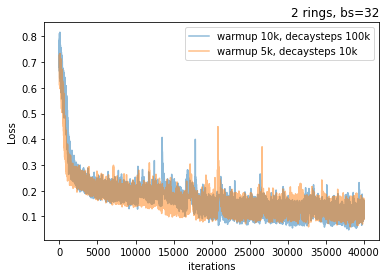

In [87]:
plt.plot(L0,color='C0',label='warmup 10k, decaysteps 100k',alpha=.5)
plt.plot(L,color='C1',label='warmup 5k, decaysteps 10k',alpha=.5)

plt.title(f'2 rings, bs={bs}',loc='right')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()

**Compare batch size across experiments**

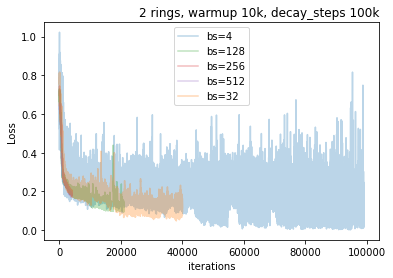

In [116]:
alpha=.3
for bs,c in zip([4,128,256,512],['C0','C2','C3','C4']):
    try:
        with open(f'code/models/2blobs-bs-{bs}/loss.json') as f:
            ld = json.load(f)
        plt.plot(ld,label=f'bs={bs}',color=c,alpha=alpha)

    except FileNotFoundError:
        print(f'bs {bs} doesn\'t exist yet')
        
        
plt.plot(L0,color='C1',label='bs=32',alpha=alpha)


plt.title(f'2 rings, warmup 10k, decay_steps 100k',loc='right')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()